In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('train.csv')

In [3]:
test=pd.read_csv('test.csv')

In [4]:
train.head()

id                              belongs_to_collection    budget  \
0   1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   
1   2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000   
2   3                                                NaN   3300000   
3   4                                                NaN   1200000   
4   5                                                NaN         0   

                                              genres  \
0                     [{'id': 35, 'name': 'Comedy'}]   
1  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
2                      [{'id': 18, 'name': 'Drama'}]   
3  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
4  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   

                            homepage    imdb_id original_language  \
0                                NaN  tt2637294                en   
1                                NaN  tt0368933                en   
2  http://sonyclassics.com/whiplash/  tt2582802                en   
3         http://kahaanithefilm.com/  tt1821480                hi   
4                                NaN  tt1380152                ko   

                             original_title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                      마린보이   

                                            overview  popularity  ...  \
0  When Lou, who has become the "father of the In...    6.575393  ...   
1  Mia Thermopolis is now a college graduate and ...    8.248895  ...   
2  Under the direction of a ruthless instructor, ...   64.299990  ...   
3  Vidya Bagchi (Vidya Balan) arrives in Kolkata ...    3.174936  ...   
4  Marine Boy is the story of a former national s...    1.148070  ...   

  release_date runtime                                   spoken_languages  \
0      2/20/15    93.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1       8/6/04   113.0           [{'iso_639_1': 'en', 'name': 'English'}]   
2     10/10/14   105.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3       3/9/12   122.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
4       2/5/09   118.0           [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]   

     status                                            tagline  \
0  Released  The Laws of Space and Time are About to be Vio...   
1  Released  It can take a lifetime to find true love; she'...   
2  Released    The road to greatness can take you to the edge.   
3  Released                                                NaN   
4  Released                                                NaN   

                                      title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                Marine Boy   

                                            Keywords  \
0  [{'id': 4379, 'name': 'time travel'}, {'id': 9...   
1  [{'id': 2505, 'name': 'coronation'}, {'id': 42...   
2  [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...   
3  [{'id': 10092, 'name': 'mystery'}, {'id': 1054...   
4                                                NaN   

                                                cast  \
0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...   
1  [{'cast_id': 1, 'character': 'Mia Thermopolis'...   
2  [{'cast_id': 5, 'character': 'Andrew Neimann',...   
3  [{'cast_id': 1, 'character': 'Vidya Bagchi', '...   
4  [{'cast_id': 3, 'character': 'Chun-soo', 'cred...   

                                                crew   revenue  
0  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  12314651  
1  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  95149435  
2  [{'credit_id': '54d5356ec3a3683ba0000039', 'de...  13092000  
3  [{'credit_id': '52fe48779251

In [5]:
test.head()

id                              belongs_to_collection   budget  \
0  3001  [{'id': 34055, 'name': 'Pokémon Collection', '...        0   
1  3002                                                NaN    88000   
2  3003                                                NaN        0   
3  3004                                                NaN  6800000   
4  3005                                                NaN  2000000   

                                              genres  \
0  [{'id': 12, 'name': 'Adventure'}, {'id': 16, '...   
1  [{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...   
2  [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...   
3  [{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...   
4  [{'id': 36, 'name': 'History'}, {'id': 99, 'na...   

                                            homepage    imdb_id  \
0  http://www.pokemon.com/us/movies/movie-pokemon...  tt1226251   
1                                                NaN  tt0051380   
2                                                NaN  tt0118556   
3             http://www.sonyclassics.com/incendies/  tt1255953   
4                                                NaN  tt0418753   

  original_language               original_title  \
0                ja           ディアルガVSパルキアVSダークライ   
1                en  Attack of the 50 Foot Woman   
2                en             Addicted to Love   
3                fr                    Incendies   
4                en           Inside Deep Throat   

                                            overview  popularity  ...  \
0  Ash and friends (this time accompanied by newc...    3.851534  ...   
1  When an abused wife grows to giant size becaus...    3.559789  ...   
2  Good-natured astronomer Sam is devastated when...    8.085194  ...   
3  A mother's last wishes send twins Jeanne and S...    8.596012  ...   
4  In 1972, a seemingly typical shoestring budget...    3.217680  ...   

                                production_countries release_date runtime  \
0  [{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...      7/14/07    90.0   
1  [{'iso_3166_1': 'US', 'name': 'United States o...      5/19/58    65.0   
2  [{'iso_3166_1': 'US', 'name': 'United States o...      5/23/97   100.0   
3  [{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...       9/4/10   130.0   
4  [{'iso_3166_1': 'US', 'name': 'United States o...      2/11/05    92.0   

                                    spoken_languages    status  \
0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
1           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
2           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3  [{'iso_639_1': 'fr', 'name': 'Français'}, {'is...  Released   
4           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline  \
0  Somewhere Between Time & Space... A Legend Is ...   
1  A titanic beauty spreads a macabre wave of hor...   
2          A Comedy About Lost Loves And Last Laughs   
3  The search began at the opening of their mothe...   
4  It was filmed in 6 days for 25 thousand dollar...   

                          title  \
0  Pokémon: The Rise of Darkrai   
1   Attack of the 50 Foot Woman   
2              Addicted to Love   
3                     Incendies   
4            Inside Deep Throat   

                                            Keywords  \
0  [{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...   
1  [{'id': 9748, 'name': 'revenge'}, {'id': 9951,...   
2  [{'id': 931, 'name': 'jealousy'}, {'id': 9673,...   
3  [{'id': 378, 'name': 'prison'}, {'id': 539, 'n...   
4  [{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...   

                                                cast  \
0  [{'cast_id': 3, 'character': 'Tonio', 'credit_...   
1  [{'cast_id': 2, 'character': 'Nancy Fowler Arc...   
2  [{'cast_id': 11, 'character': 'Maggie', 'credi...   
3  [{'cast_id': 6, 'character': 'Nawal', 'credit_...   
4  [{'cast_id': 1, 'character': 'Narrator (voice)...   

    

In [6]:
train.shape

(3000, 23)

In [7]:
test.shape

(4398, 22)

In [8]:
import ast

In [9]:
dict_columns = ['belongs_to_collection', 'genres', 'production_companies', 'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
    return df

In [10]:
train = text_to_dict(train)
test = text_to_dict(test)

In [11]:
train.shape, test.shape

((3000, 23), (4398, 22))

In [12]:
train.head()

id                              belongs_to_collection    budget  \
0   1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   
1   2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000   
2   3                                                 {}   3300000   
3   4                                                 {}   1200000   
4   5                                                 {}         0   

                                              genres  \
0                     [{'id': 35, 'name': 'Comedy'}]   
1  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
2                      [{'id': 18, 'name': 'Drama'}]   
3  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
4  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   

                            homepage    imdb_id original_language  \
0                                NaN  tt2637294                en   
1                                NaN  tt0368933                en   
2  http://sonyclassics.com/whiplash/  tt2582802                en   
3         http://kahaanithefilm.com/  tt1821480                hi   
4                                NaN  tt1380152                ko   

                             original_title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                      마린보이   

                                            overview  popularity  ...  \
0  When Lou, who has become the "father of the In...    6.575393  ...   
1  Mia Thermopolis is now a college graduate and ...    8.248895  ...   
2  Under the direction of a ruthless instructor, ...   64.299990  ...   
3  Vidya Bagchi (Vidya Balan) arrives in Kolkata ...    3.174936  ...   
4  Marine Boy is the story of a former national s...    1.148070  ...   

  release_date runtime                                   spoken_languages  \
0      2/20/15    93.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1       8/6/04   113.0           [{'iso_639_1': 'en', 'name': 'English'}]   
2     10/10/14   105.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3       3/9/12   122.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
4       2/5/09   118.0           [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]   

     status                                            tagline  \
0  Released  The Laws of Space and Time are About to be Vio...   
1  Released  It can take a lifetime to find true love; she'...   
2  Released    The road to greatness can take you to the edge.   
3  Released                                                NaN   
4  Released                                                NaN   

                                      title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                Marine Boy   

                                            Keywords  \
0  [{'id': 4379, 'name': 'time travel'}, {'id': 9...   
1  [{'id': 2505, 'name': 'coronation'}, {'id': 42...   
2  [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...   
3  [{'id': 10092, 'name': 'mystery'}, {'id': 1054...   
4                                                 {}   

                                                cast  \
0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...   
1  [{'cast_id': 1, 'character': 'Mia Thermopolis'...   
2  [{'cast_id': 5, 'character': 'Andrew Neimann',...   
3  [{'cast_id': 1, 'character': 'Vidya Bagchi', '...   
4  [{'cast_id': 3, 'character': 'Chun-soo', 'cred...   

                                                crew   revenue  
0  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  12314651  
1  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  95149435  
2  [{'credit_id': '54d5356ec3a3683ba0000039', 'de...  13092000  
3  [{'credit_id': '52fe48779251

In [13]:
test.head()

id                              belongs_to_collection   budget  \
0  3001  [{'id': 34055, 'name': 'Pokémon Collection', '...        0   
1  3002                                                 {}    88000   
2  3003                                                 {}        0   
3  3004                                                 {}  6800000   
4  3005                                                 {}  2000000   

                                              genres  \
0  [{'id': 12, 'name': 'Adventure'}, {'id': 16, '...   
1  [{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...   
2  [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...   
3  [{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...   
4  [{'id': 36, 'name': 'History'}, {'id': 99, 'na...   

                                            homepage    imdb_id  \
0  http://www.pokemon.com/us/movies/movie-pokemon...  tt1226251   
1                                                NaN  tt0051380   
2                                                NaN  tt0118556   
3             http://www.sonyclassics.com/incendies/  tt1255953   
4                                                NaN  tt0418753   

  original_language               original_title  \
0                ja           ディアルガVSパルキアVSダークライ   
1                en  Attack of the 50 Foot Woman   
2                en             Addicted to Love   
3                fr                    Incendies   
4                en           Inside Deep Throat   

                                            overview  popularity  ...  \
0  Ash and friends (this time accompanied by newc...    3.851534  ...   
1  When an abused wife grows to giant size becaus...    3.559789  ...   
2  Good-natured astronomer Sam is devastated when...    8.085194  ...   
3  A mother's last wishes send twins Jeanne and S...    8.596012  ...   
4  In 1972, a seemingly typical shoestring budget...    3.217680  ...   

                                production_countries release_date runtime  \
0  [{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...      7/14/07    90.0   
1  [{'iso_3166_1': 'US', 'name': 'United States o...      5/19/58    65.0   
2  [{'iso_3166_1': 'US', 'name': 'United States o...      5/23/97   100.0   
3  [{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...       9/4/10   130.0   
4  [{'iso_3166_1': 'US', 'name': 'United States o...      2/11/05    92.0   

                                    spoken_languages    status  \
0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
1           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
2           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3  [{'iso_639_1': 'fr', 'name': 'Français'}, {'is...  Released   
4           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline  \
0  Somewhere Between Time & Space... A Legend Is ...   
1  A titanic beauty spreads a macabre wave of hor...   
2          A Comedy About Lost Loves And Last Laughs   
3  The search began at the opening of their mothe...   
4  It was filmed in 6 days for 25 thousand dollar...   

                          title  \
0  Pokémon: The Rise of Darkrai   
1   Attack of the 50 Foot Woman   
2              Addicted to Love   
3                     Incendies   
4            Inside Deep Throat   

                                            Keywords  \
0  [{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...   
1  [{'id': 9748, 'name': 'revenge'}, {'id': 9951,...   
2  [{'id': 931, 'name': 'jealousy'}, {'id': 9673,...   
3  [{'id': 378, 'name': 'prison'}, {'id': 539, 'n...   
4  [{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...   

                                                cast  \
0  [{'cast_id': 3, 'character': 'Tonio', 'credit_...   
1  [{'cast_id': 2, 'character': 'Nancy Fowler Arc...   
2  [{'cast_id': 11, 'character': 'Maggie', 'credi...   
3  [{'cast_id': 6, 'character': 'Nawal', 'credit_...   
4  [{'cast_id': 1, 'character': 'Narrator (voice)...   

    

In [14]:
### There are only 3000 samples in dataset.
### I can see that some of columns contain lists with dictionaries. Some lists contain a single dictionary, some have several.
### Let's extract data from these columns!

In [15]:
for i, e in enumerate(train['belongs_to_collection'][:5]):
    print(i, e)

0 [{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]
1 [{'id': 107674, 'name': 'The Princess Diaries Collection', 'poster_path': '/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg', 'backdrop_path': '/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg'}]
2 {}
3 {}
4 {}


In [16]:
train['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0).value_counts()

0    2396
1     604
Name: belongs_to_collection, dtype: int64

In [17]:
###2396 values in this column are empty, 604 contrain information about the collections.
###I suppose that only collection name can be useful. Another possibly useful feature is the fact of belonging to a collection.

In [18]:
train['collection_name'] = train['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
train['has_collection'] = train['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0)

test['collection_name'] = test['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
test['has_collection'] = test['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0)

train = train.drop(['belongs_to_collection'], axis=1)
test = test.drop(['belongs_to_collection'], axis=1)

In [19]:
train.head()

id    budget                                             genres  \
0   1  14000000                     [{'id': 35, 'name': 'Comedy'}]   
1   2  40000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
2   3   3300000                      [{'id': 18, 'name': 'Drama'}]   
3   4   1200000  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
4   5         0  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   

                            homepage    imdb_id original_language  \
0                                NaN  tt2637294                en   
1                                NaN  tt0368933                en   
2  http://sonyclassics.com/whiplash/  tt2582802                en   
3         http://kahaanithefilm.com/  tt1821480                hi   
4                                NaN  tt1380152                ko   

                             original_title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                      마린보이   

                                            overview  popularity  \
0  When Lou, who has become the "father of the In...    6.575393   
1  Mia Thermopolis is now a college graduate and ...    8.248895   
2  Under the direction of a ruthless instructor, ...   64.299990   
3  Vidya Bagchi (Vidya Balan) arrives in Kolkata ...    3.174936   
4  Marine Boy is the story of a former national s...    1.148070   

                        poster_path  ...  \
0  /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg  ...   
1  /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg  ...   
2  /lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg  ...   
3  /aTXRaPrWSinhcmCrcfJK17urp3F.jpg  ...   
4  /m22s7zvkVFDU9ir56PiiqIEWFdT.jpg  ...   

                                    spoken_languages    status  \
0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
2           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
4           [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]  Released   

                                             tagline  \
0  The Laws of Space and Time are About to be Vio...   
1  It can take a lifetime to find true love; she'...   
2    The road to greatness can take you to the edge.   
3                                                NaN   
4                                                NaN   

                                      title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                Marine Boy   

                                            Keywords  \
0  [{'id': 4379, 'name': 'time travel'}, {'id': 9...   
1  [{'id': 2505, 'name': 'coronation'}, {'id': 42...   
2  [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...   
3  [{'id': 10092, 'name': 'mystery'}, {'id': 1054...   
4                                                 {}   

                                                cast  \
0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...   
1  [{'cast_id': 1, 'character': 'Mia Thermopolis'...   
2  [{'cast_id': 5, 'character': 'Andrew Neimann',...   
3  [{'cast_id': 1, 'character': 'Vidya Bagchi', '...   
4  [{'cast_id': 3, 'character': 'Chun-soo', 'cred...   

                                                crew   revenue  \
0  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  12314651   
1  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  95149435   
2  [{'credit_id': '54d5356ec3a3683ba0000039', 'de...  13092000   
3  [{'credit_id': '52fe48779251416c9108d6eb', 'de...  16000000   
4  [{'credit_id': '52fe464b9251416c75073b43', 'de...   3923970   

                   collection_name has_collection  
0  Hot Tub Time Machine Collection              1  
1  The Princess Di

In [20]:
##genres

In [21]:
for i, e in enumerate(train['genres'][:5]):
    print(i, e)

0 [{'id': 35, 'name': 'Comedy'}]
1 [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]
2 [{'id': 18, 'name': 'Drama'}]
3 [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]
4 [{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]


In [22]:
print('Number of genres in films')
train['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts()

Number of genres in films


2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: genres, dtype: int64

In [23]:
##Genres column contains named and ids of genres to which films belong. Most of films have 2-3 genres and 5-6 genres are possible. 0 and 7 are outliers, I think. Let's extract genres! I'll create a column with all genres in the film and also separate columns for each genre.
##But at first let's have a look at the genres themselves.

In [24]:
list_of_genres = list(train['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)


In [25]:
list_of_genres

[['Comedy'],
 ['Comedy', 'Drama', 'Family', 'Romance'],
 ['Drama'],
 ['Thriller', 'Drama'],
 ['Action', 'Thriller'],
 ['Animation', 'Adventure', 'Family'],
 ['Horror', 'Thriller'],
 ['Documentary'],
 ['Action', 'Comedy', 'Music', 'Family', 'Adventure'],
 ['Comedy', 'Music'],
 ['Drama'],
 ['Comedy'],
 ['Drama'],
 ['Comedy', 'Crime'],
 ['Action', 'Thriller', 'Science Fiction', 'Mystery'],
 ['Action', 'Crime', 'Drama'],
 ['Horror', 'Thriller'],
 ['Drama', 'Romance'],
 ['Comedy', 'Romance'],
 ['Action', 'Thriller', 'Crime'],
 ['Adventure', 'Family', 'Science Fiction'],
 ['Horror', 'Thriller'],
 ['Thriller', 'Horror'],
 ['Thriller', 'Mystery', 'Foreign'],
 ['Horror', 'Comedy'],
 ['Comedy', 'Horror', 'Mystery', 'Thriller'],
 ['Crime', 'Drama', 'Mystery', 'Thriller'],
 ['Drama', 'Comedy', 'Romance'],
 ['Animation'],
 ['Action', 'Adventure', 'Crime', 'Thriller'],
 ['Drama', 'Comedy'],
 ['Mystery', 'Drama', 'Thriller'],
 ['Fantasy', 'Action', 'Adventure'],
 ['Horror'],
 ['Action', 'Comedy', 'Cr

In [26]:
import sys
print(sys.executable)
!pip install wordcloud
from wordcloud import WordCloud

C:\Users\BROTHERS\Anaconda4\python.exe


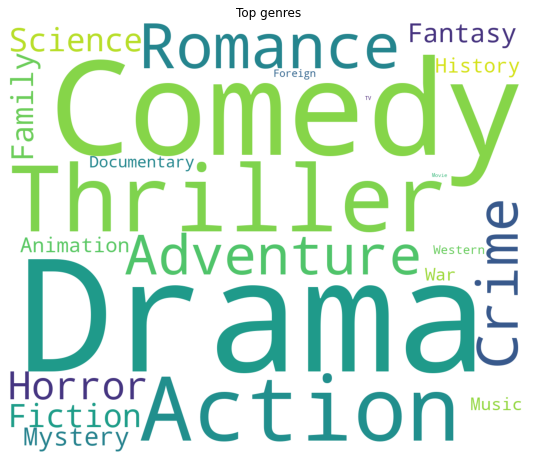

In [27]:
plt.figure(figsize = (12, 8))
text = ' '.join([i for j in list_of_genres for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top genres')
plt.axis("off")
plt.show()

In [28]:
### Drama, Comedy, Thriller and action are popular genres.

In [29]:
from collections import Counter
Counter([i for j in list_of_genres for i in j]).most_common()

[('Drama', 1531),
 ('Comedy', 1028),
 ('Thriller', 789),
 ('Action', 741),
 ('Romance', 571),
 ('Crime', 469),
 ('Adventure', 439),
 ('Horror', 301),
 ('Science Fiction', 290),
 ('Family', 260),
 ('Fantasy', 232),
 ('Mystery', 225),
 ('Animation', 141),
 ('History', 132),
 ('Music', 100),
 ('War', 100),
 ('Documentary', 87),
 ('Western', 43),
 ('Foreign', 31),
 ('TV Movie', 1)]

In [30]:
#### I'll create separate columns for top-15 genres.

In [31]:
train['num_genres'] = train['genres'].apply(lambda x: len(x) if x != {} else 0)
train['all_genres'] = train['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_genres = [m[0] for m in Counter([i for j in list_of_genres for i in j]).most_common(15)]
for g in top_genres:
    train['genre_' + g] = train['all_genres'].apply(lambda x: 1 if g in x else 0)
    
test['num_genres'] = test['genres'].apply(lambda x: len(x) if x != {} else 0)
test['all_genres'] = test['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_genres:
    test['genre_' + g] = test['all_genres'].apply(lambda x: 1 if g in x else 0)

train = train.drop(['genres'], axis=1)
test = test.drop(['genres'], axis=1)

In [32]:
train['num_genres'].head()

0    1
1    4
2    1
3    2
4    2
Name: num_genres, dtype: int64

In [33]:
train['all_genres'].head()

0                         Comedy
1    Comedy Drama Family Romance
2                          Drama
3                 Drama Thriller
4                Action Thriller
Name: all_genres, dtype: object

In [34]:
train.head()

id    budget                           homepage    imdb_id  \
0   1  14000000                                NaN  tt2637294   
1   2  40000000                                NaN  tt0368933   
2   3   3300000  http://sonyclassics.com/whiplash/  tt2582802   
3   4   1200000         http://kahaanithefilm.com/  tt1821480   
4   5         0                                NaN  tt1380152   

  original_language                            original_title  \
0                en                    Hot Tub Time Machine 2   
1                en  The Princess Diaries 2: Royal Engagement   
2                en                                  Whiplash   
3                hi                                   Kahaani   
4                ko                                      마린보이   

                                            overview  popularity  \
0  When Lou, who has become the "father of the In...    6.575393   
1  Mia Thermopolis is now a college graduate and ...    8.248895   
2  Under the direction of a ruthless instructor, ...   64.299990   
3  Vidya Bagchi (Vidya Balan) arrives in Kolkata ...    3.174936   
4  Marine Boy is the story of a former national s...    1.148070   

                        poster_path  \
0  /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg   
1  /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg   
2  /lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg   
3  /aTXRaPrWSinhcmCrcfJK17urp3F.jpg   
4  /m22s7zvkVFDU9ir56PiiqIEWFdT.jpg   

                                production_companies  ... genre_Crime  \
0  [{'name': 'Paramount Pictures', 'id': 4}, {'na...  ...           0   
1        [{'name': 'Walt Disney Pictures', 'id': 2}]  ...           0   
2  [{'name': 'Bold Films', 'id': 2266}, {'name': ...  ...           0   
3                                                 {}  ...           0   
4                                                 {}  ...           0   

  genre_Adventure  genre_Horror genre_Science Fiction genre_Family  \
0               0             0                     0            0   
1               0             0                     0            1   
2               0             0                     0            0   
3               0             0                     0            0   
4               0             0                     0            0   

  genre_Fantasy genre_Mystery genre_Animation genre_History genre_Music  
0             0             0               0             0           0  
1             0             0               0             0           0  
2             0             0               0             0           0  
3             0             0               0             0           0  
4             0             0               0             0           0  

[5 rows x 40 columns]

In [35]:
#### production_companies

In [36]:
for i, e in enumerate(train['production_companies'][:5]):
    print(i, e)

0 [{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]
1 [{'name': 'Walt Disney Pictures', 'id': 2}]
2 [{'name': 'Bold Films', 'id': 2266}, {'name': 'Blumhouse Productions', 'id': 3172}, {'name': 'Right of Way Films', 'id': 32157}]
3 {}
4 {}


In [37]:
print('Number of production companies in films')
train['production_companies'].apply(lambda x: len(x) if x != {} else 0).value_counts()

Number of production companies in films


1     775
2     734
3     582
4     312
5     166
0     156
6     118
7      62
8      42
9      29
11      7
10      7
12      3
16      2
15      2
14      1
13      1
17      1
Name: production_companies, dtype: int64

In [38]:
#### Most of films have 1-2 production companies, sabsometimes 3-4. But there are films with 10+ companies! 
#### Let's have a look at some of them.

In [39]:
train[train['production_companies'].apply(lambda x: len(x) if x != {} else 0) > 11]

id    budget                                           homepage  \
31      32         0                        http://www.cache-derfilm.at   
116    117         0                                                NaN   
363    364  15400000                                                NaN   
392    393         0                                                NaN   
449    450  80000000             http://asoundofthunder.warnerbros.com/   
554    555  14500000                                                NaN   
1079  1080   7000000                                                NaN   
2170  2171   4000000  http://tickets.picturehouseentertainment.co.uk...   
2395  2396         0                                                NaN   
2517  2518  97250400  http://www.asterixauxjeuxolympiques.com/index.php   

        imdb_id original_language               original_title  \
31    tt0387898                fr                        Caché   
116   tt2113822                zh                         一九四二   
363   tt2053425                fr           De rouille et d'os   
392   tt5072406                fr                         Moka   
449   tt0318081                en           A Sound of Thunder   
554   tt0293416                ja                   Metropolis   
1079  tt2737050                fr         Deux jours, une nuit   
2170  tt3464902                en                  The Lobster   
2395  tt4082068                fr                      Dheepan   
2517  tt0463872                fr  Astérix aux Jeux Olympiques   

                                               overview  popularity  \
31    A married couple is terrorized by a series of ...    5.695860   
116   In 1942, Henan Province was devastated by the ...    1.678013   
363   Put in charge of his young son, Ali leaves Bel...    8.400049   
392   Diane Kramer is led by one obsession: to find ...    2.404466   
449   When a hunter sent back to the prehistoric era...    4.980191   
554   Duke Red has overseen the construction of a ma...    9.298092   
1079  Sandra is a young woman who has only one weeke...    6.868022   
2170  In a dystopian near future, single people, acc...   11.223033   
2395  Dheepan is a Sri Lankan Tamil warrior who flee...    5.752416   
2517  Ast√©rix and Ob√©lix have to win the Olympic G...    9.671944   

                           poster_path  \
31    /i1Zl8S4DgM3IDLW5dhZzBnIdCOe.jpg   
116    /xxz2gi8vijqqJySGO3kQy2i8mv.jpg   
363   /cHCwW8xPl8yPKQwpNzKVinwvirT.jpg   
392   /5VKVaTJJsyDeOzY6fLcyTo1RA9g.jpg   
449   /gsqOX1ReJ5lcmTuDdkhOXLug8Ug.jpg   
554   /1EK7mGCpRKYmSg25FaojvnS9opm.jpg   
1079  /1mYAejpMskvskGr0J0SaBvdjmrH.jpg   
2170  /yR60EqMGS9hHq9I5Pkq2hG984TP.jpg   
2395  /lgONuekbRlM0eMvMHJBEDL6MsBP.jpg   
2517  /tKL0RJOeuccc1rrpcDKg8qhedIz.jpg   

                                   production_companies  ... genre_Crime  \
31    [{'name': 'Les Films du Losange', 'id': 223}, ...  ...           0   
116   [{'name': 'Emperor Motion Pictures', 'id': 272...  ...           0   
363   [{'name': 'France 2 Cinéma', 'id': 83}, {'name...  ...           0   
392   [{'name': 'Canal+', 'id': 5358}, {'name': 'Cin...  ...           0   
449   [{'name': 'Epsilon Motion Pictures', 'id': 117...  ...           0   
554   [{'name': 'Bandai Visual Company', 'id': 528},...  ...           0   
1079  [{'name': 'BIM Distribuzione', 'id': 225}, {'n...  ...           0   
2170  [{'name': 'Haut et Court', 'id': 726}, {'name'...  ...           0   
2395  [{'name': 'France 2 Cinéma', 'id': 83}, {'name...  ...           1   
2517  [{'name': 'Constantin Film', 'id': 47}, {'name...  ...           0   

     genre_Adventure  genre_Horror genre_Science Fiction genre_Family  \
31                 0             0                     0            0   
116                0             0                     0            0   
363                0             0                     0            0   
392                0             0                     0            0   
449     

In [40]:
list_of_companies = list(train['production_companies'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

In [41]:
list_of_companies

[['Paramount Pictures', 'United Artists', 'Metro-Goldwyn-Mayer (MGM)'],
 ['Walt Disney Pictures'],
 ['Bold Films', 'Blumhouse Productions', 'Right of Way Films'],
 [],
 [],
 [],
 ['Ghost House Pictures', 'North Box Productions'],
 [],
 ['Walt Disney Pictures', 'Jim Henson Productions', 'Jim Henson Company, The'],
 ['Castle Rock Entertainment'],
 ['United Artists'],
 ['Twentieth Century Fox Film Corporation',
  'Amercent Films',
  'American Entertainment Partners L.P.',
  'Interscope Communications'],
 ['DreamWorks SKG', 'Jinks/Cohen Company'],
 ['Double Feature Films',
  'Jersey Films',
  'Nina Saxon Film Design',
  'Metro-Goldwyn-Mayer (MGM)'],
 ['DreamWorks SKG',
  'Cruise/Wagner Productions',
  'Amblin Entertainment',
  'Twentieth Century Fox Film Corporation',
  'Blue Tulip Productions',
  'Ronald Shusett/Gary Goldman',
  'Digital Image Associates'],
 ['Hypnopolis'],
 ['DreamWorks SKG', 'Craven-Maddalena Films', 'BenderSpink'],
 ['BBC Films',
  'Headline Pictures',
  'Magnolia Mae 

In [42]:
Counter([i for j in list_of_companies for i in j]).most_common(30)

[('Warner Bros.', 202),
 ('Universal Pictures', 188),
 ('Paramount Pictures', 161),
 ('Twentieth Century Fox Film Corporation', 138),
 ('Columbia Pictures', 91),
 ('Metro-Goldwyn-Mayer (MGM)', 84),
 ('New Line Cinema', 75),
 ('Touchstone Pictures', 63),
 ('Walt Disney Pictures', 62),
 ('Columbia Pictures Corporation', 61),
 ('TriStar Pictures', 53),
 ('Relativity Media', 48),
 ('Canal+', 46),
 ('United Artists', 44),
 ('Miramax Films', 40),
 ('Village Roadshow Pictures', 36),
 ('Regency Enterprises', 31),
 ('BBC Films', 30),
 ('Dune Entertainment', 30),
 ('Working Title Films', 30),
 ('Fox Searchlight Pictures', 29),
 ('StudioCanal', 28),
 ('Lionsgate', 28),
 ('DreamWorks SKG', 27),
 ('Fox 2000 Pictures', 25),
 ('Summit Entertainment', 24),
 ('Hollywood Pictures', 24),
 ('Orion Pictures', 24),
 ('Amblin Entertainment', 23),
 ('Dimension Films', 23)]

In [43]:
#### For now I'm not sure what to do with this data. I'll simply create binary columns for top-30 films. Maybe later I'll have a better idea.

In [44]:
train['num_companies'] = train['production_companies'].apply(lambda x: len(x) if x != {} else 0)
train['all_production_companies'] = train['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_companies = [m[0] for m in Counter([i for j in list_of_companies for i in j]).most_common(30)]
for g in top_companies:
    train['production_company_' + g] = train['all_production_companies'].apply(lambda x: 1 if g in x else 0)
    
test['num_companies'] = test['production_companies'].apply(lambda x: len(x) if x != {} else 0)
test['all_production_companies'] = test['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_companies:
    test['production_company_' + g] = test['all_production_companies'].apply(lambda x: 1 if g in x else 0)

train = train.drop(['production_companies', 'all_production_companies'], axis=1)
test = test.drop(['production_companies', 'all_production_companies'], axis=1)

In [45]:
train.shape

(3000, 70)

In [46]:
#### production countries

In [47]:
for i, e in enumerate(train['production_countries'][:5]):
    print(i, e)

0 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
1 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
2 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
3 [{'iso_3166_1': 'IN', 'name': 'India'}]
4 [{'iso_3166_1': 'KR', 'name': 'South Korea'}]


In [48]:
print('Number of production countries in films')
train['production_countries'].apply(lambda x: len(x) if x != {} else 0).value_counts()

Number of production countries in films


1    2222
2     525
3     116
4      57
0      55
5      21
6       3
8       1
Name: production_countries, dtype: int64

In [49]:
#### Normally films are produced by a single country, but there are cases when companies from several countries worked together.

In [50]:
list_of_countries = list(train['production_countries'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_countries for i in j]).most_common(25)

[('United States of America', 2282),
 ('United Kingdom', 380),
 ('France', 222),
 ('Germany', 167),
 ('Canada', 120),
 ('India', 81),
 ('Italy', 64),
 ('Japan', 61),
 ('Australia', 61),
 ('Russia', 58),
 ('Spain', 54),
 ('China', 42),
 ('Hong Kong', 42),
 ('Ireland', 23),
 ('Belgium', 23),
 ('South Korea', 22),
 ('Mexico', 19),
 ('Sweden', 18),
 ('New Zealand', 17),
 ('Netherlands', 15),
 ('Czech Republic', 14),
 ('Denmark', 13),
 ('Brazil', 12),
 ('Luxembourg', 10),
 ('South Africa', 10)]

In [51]:
train['num_countries'] = train['production_countries'].apply(lambda x: len(x) if x != {} else 0)
train['all_countries'] = train['production_countries'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_countries = [m[0] for m in Counter([i for j in list_of_countries for i in j]).most_common(25)]
for g in top_countries:
    train['production_country_' + g] = train['all_countries'].apply(lambda x: 1 if g in x else 0)
    
test['num_countries'] = test['production_countries'].apply(lambda x: len(x) if x != {} else 0)
test['all_countries'] = test['production_countries'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_countries:
    test['production_country_' + g] = test['all_countries'].apply(lambda x: 1 if g in x else 0)

train = train.drop(['production_countries', 'all_countries'], axis=1)
test = test.drop(['production_countries', 'all_countries'], axis=1)

In [52]:
#### Spoken languages

In [53]:
for i, e in enumerate(train['spoken_languages'][:5]):
    print(i, e)

0 [{'iso_639_1': 'en', 'name': 'English'}]
1 [{'iso_639_1': 'en', 'name': 'English'}]
2 [{'iso_639_1': 'en', 'name': 'English'}]
3 [{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'hi', 'name': 'हिन्दी'}]
4 [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]


In [54]:
print('Number of spoken languages in films')
train['spoken_languages'].apply(lambda x: len(x) if x != {} else 0).value_counts()

Number of spoken languages in films


1    2105
2     549
3     216
4      72
5      23
0      20
7       6
6       6
8       2
9       1
Name: spoken_languages, dtype: int64

In [55]:
list_of_languages = list(train['spoken_languages'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_languages for i in j]).most_common(15)

[('English', 2618),
 ('Français', 288),
 ('Español', 239),
 ('Deutsch', 169),
 ('Pусский', 152),
 ('Italiano', 124),
 ('日本語', 89),
 ('普通话', 68),
 ('हिन्दी', 56),
 ('', 47),
 ('Português', 43),
 ('العربية', 40),
 ('한국어/조선말', 37),
 ('广州话 / 廣州話', 36),
 ('தமிழ்', 27)]

In [56]:
train['num_languages'] = train['spoken_languages'].apply(lambda x: len(x) if x != {} else 0)
train['all_languages'] = train['spoken_languages'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_languages = [m[0] for m in Counter([i for j in list_of_languages for i in j]).most_common(30)]
for g in top_languages:
    train['language_' + g] = train['all_languages'].apply(lambda x: 1 if g in x else 0)
    
test['num_languages'] = test['spoken_languages'].apply(lambda x: len(x) if x != {} else 0)
test['all_languages'] = test['spoken_languages'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_languages:
    test['language_' + g] = test['all_languages'].apply(lambda x: 1 if g in x else 0)

train = train.drop(['spoken_languages', 'all_languages'], axis=1)
test = test.drop(['spoken_languages', 'all_languages'], axis=1)

In [57]:
train.shape

(3000, 125)

In [58]:
#### Keywords

In [59]:
for i, e in enumerate(train['Keywords'][:5]):
    print(i, e)

0 [{'id': 4379, 'name': 'time travel'}, {'id': 9663, 'name': 'sequel'}, {'id': 11830, 'name': 'hot tub'}, {'id': 179431, 'name': 'duringcreditsstinger'}]
1 [{'id': 2505, 'name': 'coronation'}, {'id': 4263, 'name': 'duty'}, {'id': 6038, 'name': 'marriage'}, {'id': 13072, 'name': 'falling in love'}]
2 [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'name': 'obsession'}, {'id': 1640, 'name': 'conservatory'}, {'id': 2176, 'name': 'music teacher'}, {'id': 14512, 'name': 'new york city'}, {'id': 14819, 'name': 'violence'}, {'id': 33896, 'name': 'montage'}, {'id': 156823, 'name': 'drummer'}, {'id': 170418, 'name': 'public humiliation'}, {'id': 176095, 'name': 'jazz band'}, {'id': 206298, 'name': 'young adult'}, {'id': 207739, 'name': 'music school'}]
3 [{'id': 10092, 'name': 'mystery'}, {'id': 10540, 'name': 'bollywood'}, {'id': 11734, 'name': 'police corruption'}, {'id': 14536, 'name': 'crime'}, {'id': 14636, 'name': 'india'}, {'id': 208364, 'name': 'missing husband'}, {'id': 220935, 'name': 'ne

In [60]:
print('Number of Keywords in films')
train['Keywords'].apply(lambda x: len(x) if x != {} else 0).value_counts().head(10)

Number of Keywords in films


5    293
0    276
4    248
3    228
6    227
2    207
7    192
1    187
8    161
9    134
Name: Keywords, dtype: int64

In [61]:
### Here are some keywords describing films. Of course there can be a lot of them. Let's have a look at the most common ones.

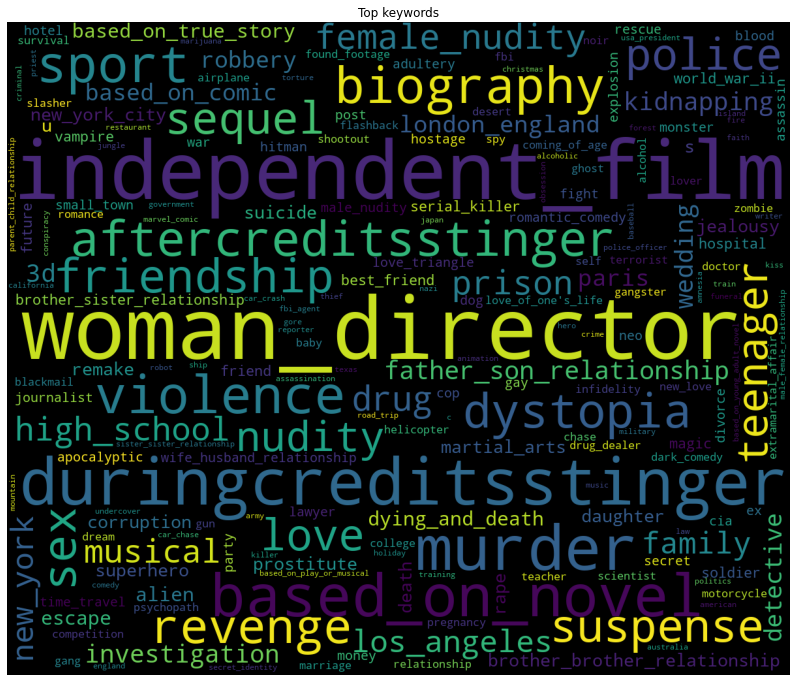

In [62]:
list_of_keywords = list(train['Keywords'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
plt.figure(figsize = (16, 12))
text = ' '.join(['_'.join(i.split(' ')) for j in list_of_keywords for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='black', collocations=False,width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top keywords')
plt.axis("off")
plt.show()

In [63]:
train['num_Keywords'] = train['Keywords'].apply(lambda x: len(x) if x != {} else 0)
train['all_Keywords'] = train['Keywords'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_keywords = [m[0] for m in Counter([i for j in list_of_keywords for i in j]).most_common(30)]
for g in top_keywords:
    train['keyword_' + g] = train['all_Keywords'].apply(lambda x: 1 if g in x else 0)
    
test['num_Keywords'] = test['Keywords'].apply(lambda x: len(x) if x != {} else 0)
test['all_Keywords'] = test['Keywords'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_keywords:
    test['keyword_' + g] = test['all_Keywords'].apply(lambda x: 1 if g in x else 0)

train = train.drop(['Keywords', 'all_Keywords'], axis=1)
test = test.drop(['Keywords', 'all_Keywords'], axis=1)

In [64]:
train.shape

(3000, 155)

In [65]:
### cast

In [66]:
for i, e in enumerate(train['cast'][:1]):
    print(i, e)

0 [{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}, {'cast_id': 5, 'character': 'Nick', 'credit_id': '52fe4ee7c3a36847f82afaeb', 'gender': 2, 'id': 64342, 'name': 'Craig Robinson', 'order': 1, 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}, {'cast_id': 6, 'character': 'Jacob', 'credit_id': '52fe4ee7c3a36847f82afaef', 'gender': 2, 'id': 54729, 'name': 'Clark Duke', 'order': 2, 'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'}, {'cast_id': 7, 'character': 'Adam Jr.', 'credit_id': '52fe4ee7c3a36847f82afaf3', 'gender': 2, 'id': 36801, 'name': 'Adam Scott', 'order': 3, 'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'}, {'cast_id': 8, 'character': 'Hot Tub Repairman', 'credit_id': '52fe4ee7c3a36847f82afaf7', 'gender': 2, 'id': 54812, 'name': 'Chevy Chase', 'order': 4, 'profile_path': '/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg'}, {'cast_id': 9, 'characte

In [67]:
print('Number of casted persons in films')
train['cast'].apply(lambda x: len(x) if x != {} else 0).value_counts().head(10)

Number of casted persons in films


15    212
16    165
10    135
13    129
12    124
11    122
9     118
17    118
18    115
14    110
Name: cast, dtype: int64

In [68]:
#Those who are casted heavily impact the quality of the film. We have not only the name of the actor, but also the gender and character name/type.
#At first let's have a look at the popular names

In [69]:
list_of_cast_names = list(train['cast'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_cast_names for i in j]).most_common(15)

[('Samuel L. Jackson', 30),
 ('Robert De Niro', 30),
 ('Morgan Freeman', 27),
 ('J.K. Simmons', 25),
 ('Bruce Willis', 25),
 ('Liam Neeson', 25),
 ('Susan Sarandon', 25),
 ('Bruce McGill', 24),
 ('John Turturro', 24),
 ('Forest Whitaker', 23),
 ('Willem Dafoe', 23),
 ('Bill Murray', 22),
 ('Owen Wilson', 22),
 ('Nicolas Cage', 22),
 ('Sylvester Stallone', 21)]

In [70]:
list_of_cast_genders = list(train['cast'].apply(lambda x: [i['gender'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_cast_genders for i in j]).most_common()

[(2, 27949), (0, 20329), (1, 13533)]

In [71]:
### 0 is unspecified, 1 is female, and 2 is male.

In [72]:
list_of_cast_characters = list(train['cast'].apply(lambda x: [i['character'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_cast_characters for i in j]).most_common(15)

[('', 818),
 ('Himself', 610),
 ('Herself', 155),
 ('Dancer', 144),
 ('Additional Voices (voice)', 100),
 ('Doctor', 77),
 ('Reporter', 70),
 ('Waitress', 69),
 ('Nurse', 65),
 ('Bartender', 55),
 ('Jack', 54),
 ('Debutante', 54),
 ('Security Guard', 50),
 ('Paul', 48),
 ('Frank', 44)]

In [73]:
## I think it is quite funny the most popular male role is playing himself. :)

In [74]:
train['num_cast'] = train['cast'].apply(lambda x: len(x) if x != {} else 0)
top_cast_names = [m[0] for m in Counter([i for j in list_of_cast_names for i in j]).most_common(15)]
for g in top_cast_names:
    train['cast_name_' + g] = train['cast'].apply(lambda x: 1 if g in str(x) else 0)
train['genders_0_cast'] = train['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
train['genders_1_cast'] = train['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
train['genders_2_cast'] = train['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
top_cast_characters = [m[0] for m in Counter([i for j in list_of_cast_characters for i in j]).most_common(15)]
for g in top_cast_characters:
    train['cast_character_' + g] = train['cast'].apply(lambda x: 1 if g in str(x) else 0)
    
test['num_cast'] = test['cast'].apply(lambda x: len(x) if x != {} else 0)
for g in top_cast_names:
    test['cast_name_' + g] = test['cast'].apply(lambda x: 1 if g in str(x) else 0)
test['genders_0_cast'] = test['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
test['genders_1_cast'] = test['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
test['genders_2_cast'] = test['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
for g in top_cast_characters:
    test['cast_character_' + g] = test['cast'].apply(lambda x: 1 if g in str(x) else 0)

train = train.drop(['cast'], axis=1)
test = test.drop(['cast'], axis=1)

In [75]:
train.shape

(3000, 188)

In [76]:
train.head()

id    budget                           homepage    imdb_id  \
0   1  14000000                                NaN  tt2637294   
1   2  40000000                                NaN  tt0368933   
2   3   3300000  http://sonyclassics.com/whiplash/  tt2582802   
3   4   1200000         http://kahaanithefilm.com/  tt1821480   
4   5         0                                NaN  tt1380152   

  original_language                            original_title  \
0                en                    Hot Tub Time Machine 2   
1                en  The Princess Diaries 2: Royal Engagement   
2                en                                  Whiplash   
3                hi                                   Kahaani   
4                ko                                      마린보이   

                                            overview  popularity  \
0  When Lou, who has become the "father of the In...    6.575393   
1  Mia Thermopolis is now a college graduate and ...    8.248895   
2  Under the direction of a ruthless instructor, ...   64.299990   
3  Vidya Bagchi (Vidya Balan) arrives in Kolkata ...    3.174936   
4  Marine Boy is the story of a former national s...    1.148070   

                        poster_path release_date  ...  cast_character_Doctor  \
0  /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg      2/20/15  ...                      0   
1  /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg       8/6/04  ...                      0   
2  /lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg     10/10/14  ...                      0   
3  /aTXRaPrWSinhcmCrcfJK17urp3F.jpg       3/9/12  ...                      0   
4  /m22s7zvkVFDU9ir56PiiqIEWFdT.jpg       2/5/09  ...                      0   

  cast_character_Reporter cast_character_Waitress cast_character_Nurse  \
0                       0                       0                    0   
1                       0                       0                    0   
2                       0                       0                    0   
3                       0                       0                    0   
4                       0                       0                    0   

  cast_character_Bartender  cast_character_Jack cast_character_Debutante  \
0                        0                    0                        0   
1                        0                    0                        0   
2                        1                    0                        0   
3                        0                    0                        0   
4                        0                    0                        0   

   cast_character_Security Guard  cast_character_Paul cast_character_Frank  
0                              0                    0                    0  
1                              0                    1                    0  
2                              0                    1                    1  
3                              0                    0                    0  
4                              0                    0                    0  

[5 rows x 188 columns]

In [77]:
for i, e in enumerate(train['crew'][:1]):
    print(i, e[:10])

0 [{'credit_id': '59ac067c92514107af02c8c8', 'department': 'Directing', 'gender': 0, 'id': 1449071, 'job': 'First Assistant Director', 'name': 'Kelly Cantley', 'profile_path': None}, {'credit_id': '52fe4ee7c3a36847f82afad7', 'department': 'Directing', 'gender': 2, 'id': 3227, 'job': 'Director', 'name': 'Steve Pink', 'profile_path': '/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg'}, {'credit_id': '5524ed25c3a3687ded000d88', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Writer', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}, {'credit_id': '5524ed2d925141720c001128', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Characters', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}, {'credit_id': '5524ed3d92514166c1004a5d', 'department': 'Production', 'gender': 2, 'id': 57822, 'job': 'Producer', 'name': 'Andrew Panay', 'profile_path': None}, {'credit_id': '5524ed4bc3a3687df3000dd2', 'department': 'Production', 'gender': 0, 'id': 14

In [78]:
print('Number of casted persons in films')
train['crew'].apply(lambda x: len(x) if x != {} else 0).value_counts().head(10)

Number of casted persons in films


2     179
11    127
10    126
3     126
12    110
9     109
8     109
14    104
4     101
7      94
Name: crew, dtype: int64

In [79]:
###The great crew is very important in creating the film. We have not only the names of the crew members, but also the genders, jobs and departments.

### At first let's have a look at the popular names.

In [80]:
list_of_crew_names = list(train['crew'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_crew_names for i in j]).most_common(15)

[('Avy Kaufman', 50),
 ('Robert Rodriguez', 44),
 ('Deborah Aquila', 40),
 ('James Newton Howard', 39),
 ('Mary Vernieu', 38),
 ('Steven Spielberg', 37),
 ('Luc Besson', 37),
 ('Jerry Goldsmith', 37),
 ('Francine Maisler', 35),
 ('Tricia Wood', 35),
 ('James Horner', 33),
 ('Kerry Barden', 32),
 ('Bob Weinstein', 30),
 ('Harvey Weinstein', 30),
 ('Janet Hirshenson', 30)]

In [81]:
list_of_crew_jobs = list(train['crew'].apply(lambda x: [i['job'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_crew_jobs for i in j]).most_common(15)

[('Producer', 6011),
 ('Executive Producer', 3459),
 ('Director', 3225),
 ('Screenplay', 2996),
 ('Editor', 2824),
 ('Casting', 2483),
 ('Director of Photography', 2288),
 ('Original Music Composer', 1947),
 ('Art Direction', 1821),
 ('Production Design', 1650),
 ('Costume Design', 1573),
 ('Writer', 1523),
 ('Set Decoration', 1345),
 ('Makeup Artist', 1108),
 ('Sound Re-Recording Mixer', 970)]

In [82]:
list_of_crew_genders = list(train['crew'].apply(lambda x: [i['gender'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_crew_genders for i in j]).most_common(15)

[(0, 41787), (2, 24898), (1, 6412)]

In [83]:
### 0 is unspecified, 1 is female, and 2 is male.

In [84]:
list_of_crew_departments = list(train['crew'].apply(lambda x: [i['department'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_crew_departments for i in j]).most_common(14)

[('Production', 15887),
 ('Sound', 9319),
 ('Art', 8069),
 ('Crew', 7315),
 ('Writing', 6567),
 ('Costume & Make-Up', 6156),
 ('Camera', 5424),
 ('Directing', 4954),
 ('Editing', 4508),
 ('Visual Effects', 3591),
 ('Lighting', 1303),
 ('Actors', 4)]

In [85]:
list_of_crew_names = train['crew'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values
Counter([i for j in list_of_crew_names for i in j]).most_common(15)

[('Avy Kaufman', 50),
 ('Robert Rodriguez', 44),
 ('Deborah Aquila', 40),
 ('James Newton Howard', 39),
 ('Mary Vernieu', 38),
 ('Steven Spielberg', 37),
 ('Luc Besson', 37),
 ('Jerry Goldsmith', 37),
 ('Francine Maisler', 35),
 ('Tricia Wood', 35),
 ('James Horner', 33),
 ('Kerry Barden', 32),
 ('Bob Weinstein', 30),
 ('Harvey Weinstein', 30),
 ('Janet Hirshenson', 30)]

In [86]:
train['num_crew'] = train['crew'].apply(lambda x: len(x) if x != {} else 0)
top_crew_names = [m[0] for m in Counter([i for j in list_of_crew_names for i in j]).most_common(15)]
for g in top_crew_names:
    train['crew_name_' + g] = train['crew'].apply(lambda x: 1 if g in str(x) else 0)
train['genders_0_crew'] = train['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
train['genders_1_crew'] = train['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
train['genders_2_crew'] = train['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
top_crew_jobs = [m[0] for m in Counter([i for j in list_of_crew_jobs for i in j]).most_common(15)]
for j in top_crew_jobs:
    train['jobs_' + j] = train['crew'].apply(lambda x: sum([1 for i in x if i['job'] == j]))
top_crew_departments = [m[0] for m in Counter([i for j in list_of_crew_departments for i in j]).most_common(15)]
for j in top_crew_departments:
    train['departments_' + j] = train['crew'].apply(lambda x: sum([1 for i in x if i['department'] == j])) 
    
test['num_crew'] = test['crew'].apply(lambda x: len(x) if x != {} else 0)
for g in top_crew_names:
    test['crew_name_' + g] = test['crew'].apply(lambda x: 1 if g in str(x) else 0)
test['genders_0_crew'] = test['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
test['genders_1_crew'] = test['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
test['genders_2_crew'] = test['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
for j in top_crew_jobs:
    test['jobs_' + j] = test['crew'].apply(lambda x: sum([1 for i in x if i['job'] == j]))
for j in top_crew_departments:
    test['departments_' + j] = test['crew'].apply(lambda x: sum([1 for i in x if i['department'] == j])) 

train = train.drop(['crew'], axis=1)
test = test.drop(['crew'], axis=1)

In [87]:
train.shape

(3000, 233)

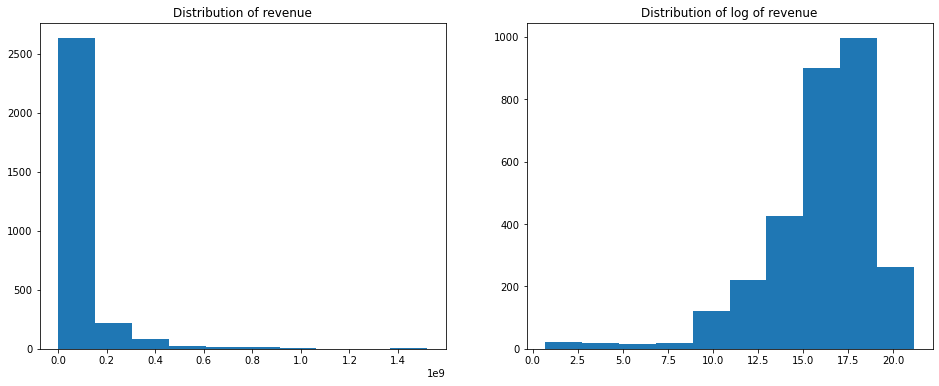

In [88]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(train['revenue']);
plt.title('Distribution of revenue');
plt.subplot(1, 2, 2)
plt.hist(np.log1p(train['revenue']));
plt.title('Distribution of log of revenue');

In [89]:
train['log_revenue'] = np.log1p(train['revenue'])
#As we can see revenue distribution has a high skewness! It is better to use np.log1p of revenue.

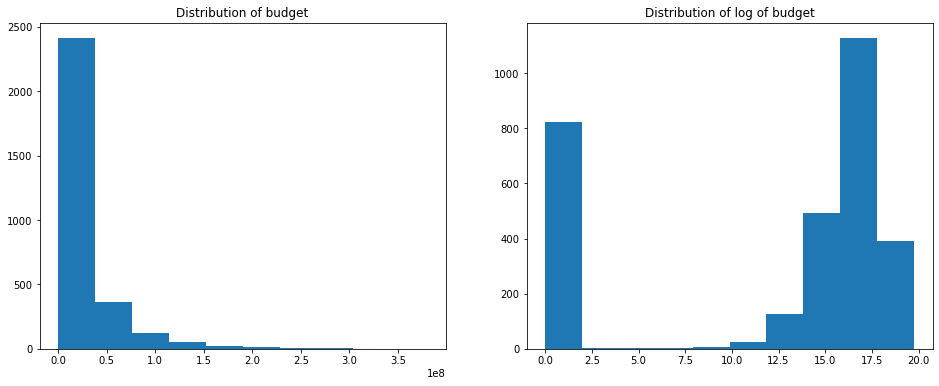

In [90]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(train['budget']);
plt.title('Distribution of budget');
plt.subplot(1, 2, 2)
plt.hist(np.log1p(train['budget']));
plt.title('Distribution of log of budget');

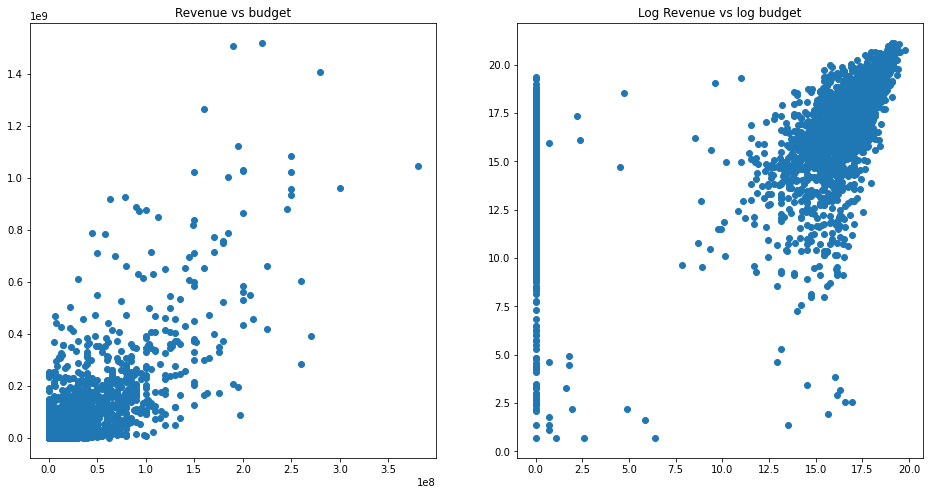

In [91]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(train['budget'], train['revenue'])
plt.title('Revenue vs budget');
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(train['budget']), train['log_revenue'])
plt.title('Log Revenue vs log budget');

#We can see that budget and revenue are somewhat correlated. Logarithm transformation makes budget distribution more managable.

In [92]:
train['log_budget'] = np.log1p(train['budget'])
test['log_budget'] = np.log1p(test['budget'])

In [93]:
train['homepage'].value_counts().head()

http://www.transformersmovie.com/                           4
http://www.thehobbit.com/                                   2
http://www.lordoftherings.net/                              2
http://neueroadmovies.com/film/every-thing-will-be-fine/    1
http://www.seabiscuitmovie.com/                             1
Name: homepage, dtype: int64

In [94]:
#### Most of homepages are unique, so this feature may be useless.

In [95]:
train['has_homepage'] = 0
train.loc[train['homepage'].isnull() == False, 'has_homepage'] = 1
test['has_homepage'] = 0
test.loc[test['homepage'].isnull() == False, 'has_homepage'] = 1

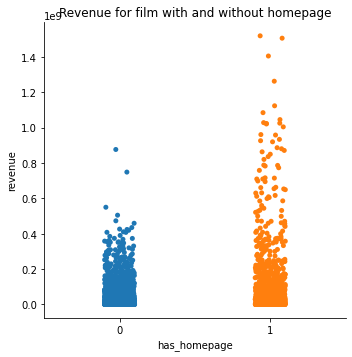

In [96]:
sns.catplot(x='has_homepage', y='revenue', data=train);
plt.title('Revenue for film with and without homepage');

In [97]:
## Films with homepage tend to generate more revenue! I suppose people can know more about the film thanks to homepage.

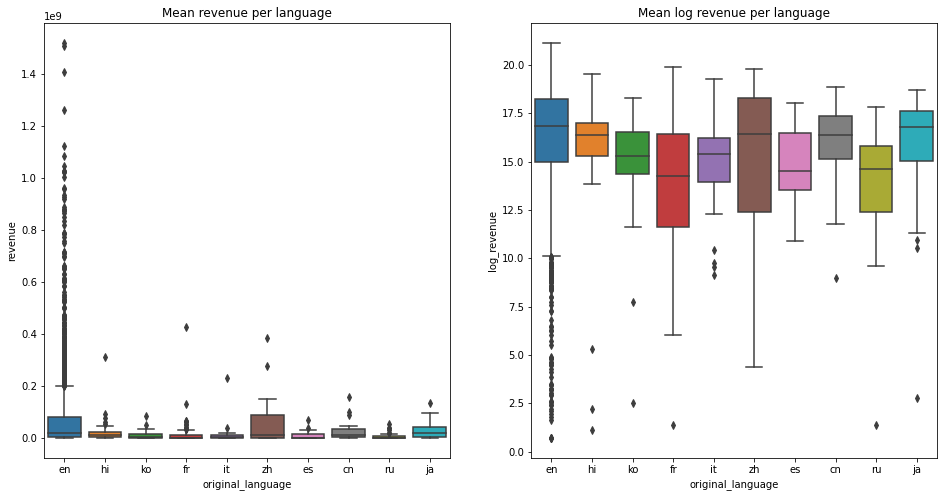

In [98]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x='original_language', y='revenue', data=train.loc[train['original_language'].isin(train['original_language'].value_counts().head(10).index)]);
plt.title('Mean revenue per language');
plt.subplot(1, 2, 2)
sns.boxplot(x='original_language', y='log_revenue', data=train.loc[train['original_language'].isin(train['original_language'].value_counts().head(10).index)]);
plt.title('Mean log revenue per language');

In [99]:
#As we know there are much more english films and they have a higher range of values.
#Films with the highest revenue are usually in English, but there are also high revenue films in other languages.

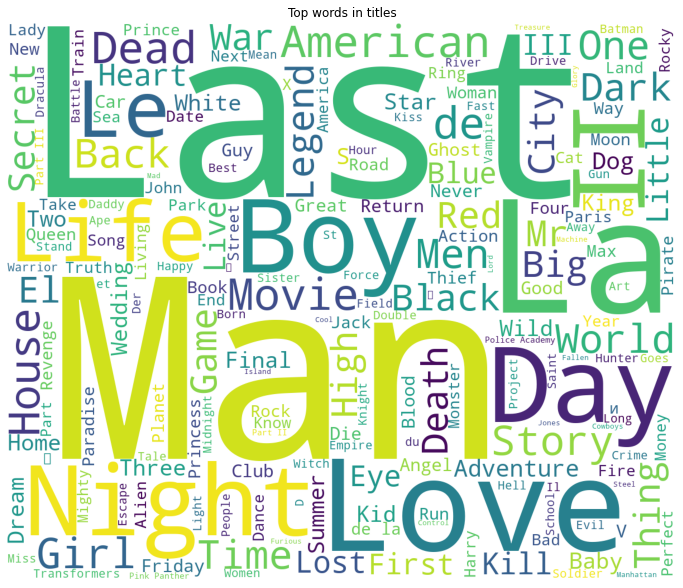

In [100]:
plt.figure(figsize = (12, 12))
text = ' '.join(train['original_title'].values)
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in titles')
plt.axis("off")
plt.show()

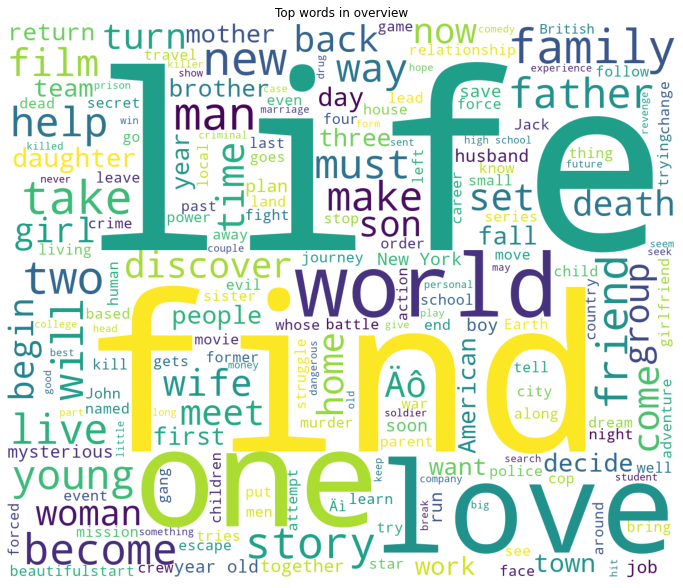

In [101]:
plt.figure(figsize = (12, 12))
text = ' '.join(train['overview'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in overview')
plt.axis("off")
plt.show()

In [ ]:
#### Let's try to see which words have high impact on the revenue. 

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import eli5
from sklearn.linear_model import LinearRegression


In [107]:
vectorizer = TfidfVectorizer(
            sublinear_tf=True,
            analyzer='word',
            token_pattern=r'\w{1,}',
            ngram_range=(1, 2),
            min_df=5)

overview_text = vectorizer.fit_transform(train['overview'].fillna(''))
linreg = LinearRegression()
linreg.fit(overview_text, train['log_revenue'])
eli5.show_weights(linreg, vec=vectorizer, top=20, feature_filter=lambda x: x != '<BIAS>')

In [108]:
print('Target value:', train['log_revenue'][1000])
eli5.show_prediction(linreg, doc=train['overview'].values[1000], vec=vectorizer)

Target value: 16.44583954907521


In [109]:
#### We can see that some words can be used to predict revenue, but we will need more that overview text to build a good model.

In [110]:
### popularity
##I'm not exactly sure what does popularity represents. Maybe it is some king of weighted rating, maybe something else. It seems it has low correlation with the target.

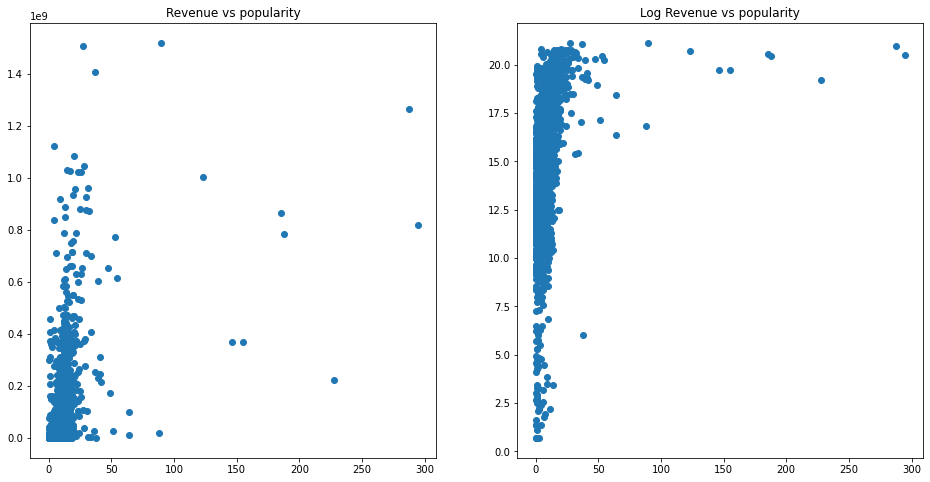

In [111]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(train['popularity'], train['revenue'])
plt.title('Revenue vs popularity');
plt.subplot(1, 2, 2)
plt.scatter(train['popularity'], train['log_revenue'])
plt.title('Log Revenue vs popularity');


In [112]:
### release_date

In [114]:
test.loc[test['release_date'].isnull() == True, 'release_date'] = '01/01/98'

In [115]:
def fix_date(x):
    """
    Fixes dates which are in 20xx
    """
    year = x.split('/')[2]
    if int(year) <= 19:
        return x[:-2] + '20' + year
    else:
        return x[:-2] + '19' + year

In [116]:
train['release_date'] = train['release_date'].apply(lambda x: fix_date(x))
test['release_date'] = test['release_date'].apply(lambda x: fix_date(x))
train['release_date'] = pd.to_datetime(train['release_date'])
test['release_date'] = pd.to_datetime(test['release_date'])

In [117]:
# creating features based on dates
def process_date(df):
    date_parts = ["year", "weekday", "month", 'weekofyear', 'day', 'quarter']
    for part in date_parts:
        part_col = 'release_date' + "_" + part
        df[part_col] = getattr(df['release_date'].dt, part).astype(int)
    
    return df

train = process_date(train)
test = process_date(test)

In [123]:
import plotly.graph_objs as go
import plotly.offline as py

In [124]:
d1 = train['release_date_year'].value_counts().sort_index()
d2 = test['release_date_year'].value_counts().sort_index()
data = [go.Scatter(x=d1.index, y=d1.values, name='train'), go.Scatter(x=d2.index, y=d2.values, name='test')]
layout = go.Layout(dict(title = "Number of films per year",
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Count'),
                  ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout))

In [125]:
d1 = train['release_date_year'].value_counts().sort_index()
d2 = train.groupby(['release_date_year'])['revenue'].sum()
data = [go.Scatter(x=d1.index, y=d1.values, name='film count'), go.Scatter(x=d2.index, y=d2.values, name='total revenue', yaxis='y2')]
layout = go.Layout(dict(title = "Number of films and total revenue per year",
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Count'),
                  yaxis2=dict(title='Total revenue', overlaying='y', side='right')
                  ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout))

In [126]:
d1 = train['release_date_year'].value_counts().sort_index()
d2 = train.groupby(['release_date_year'])['revenue'].mean()
data = [go.Scatter(x=d1.index, y=d1.values, name='film count'), go.Scatter(x=d2.index, y=d2.values, name='mean revenue', yaxis='y2')]
layout = go.Layout(dict(title = "Number of films and average revenue per year",
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Count'),
                  yaxis2=dict(title='Average revenue', overlaying='y', side='right')
                  ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout))

In [127]:
## We can see that number of films and total revenue are growing, which is to be expected. 
## But there were some years in the past with a high number of successful films, which brought high revenue.


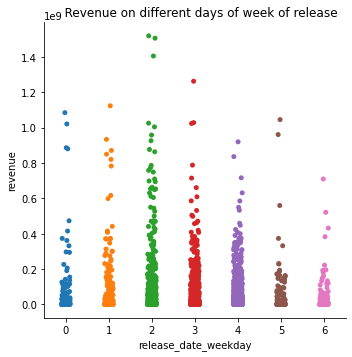

In [129]:
sns.catplot(x='release_date_weekday', y='revenue', data=train);
plt.title('   Revenue on different days of week of release');

In [130]:
## Surprisingly films releases on Wednesdays and on Thursdays tend to have a higher revenue.

In [131]:
### runtime
### The length of the film in minutes

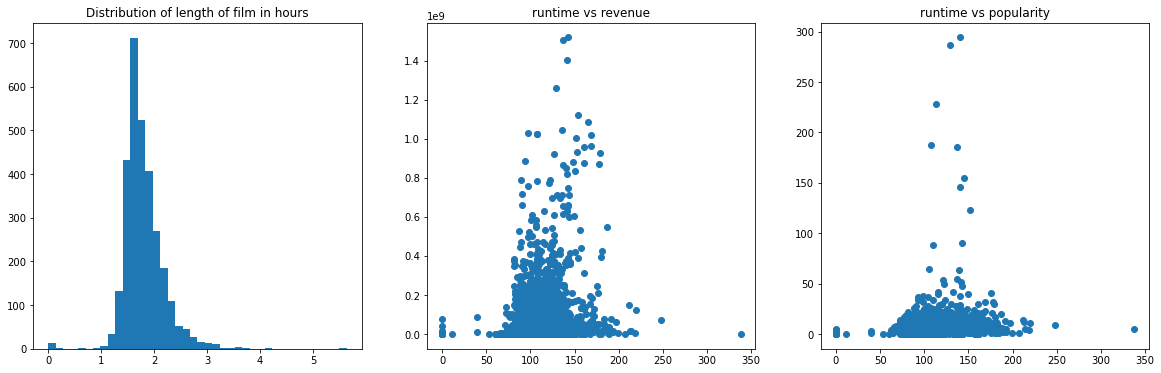

In [132]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.hist(train['runtime'].fillna(0) / 60, bins=40);
plt.title('Distribution of length of film in hours');
plt.subplot(1, 3, 2)
plt.scatter(train['runtime'].fillna(0), train['revenue'])
plt.title('runtime vs revenue');
plt.subplot(1, 3, 3)
plt.scatter(train['runtime'].fillna(0), train['popularity'])
plt.title('runtime vs popularity');

In [133]:
### It seems that most of the films are 1.5-2 hour long and films with the highest revenue are also in this range

In [134]:
#### Status
train['status'].value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

In [135]:
test['status'].value_counts()


Released           4389
Post Production       5
Rumored               2
Name: status, dtype: int64

In [136]:
### AS we can see only 4 films in train data and 7 in test aren't released yet, so this feature is quite useless.

In [137]:
# TAgline

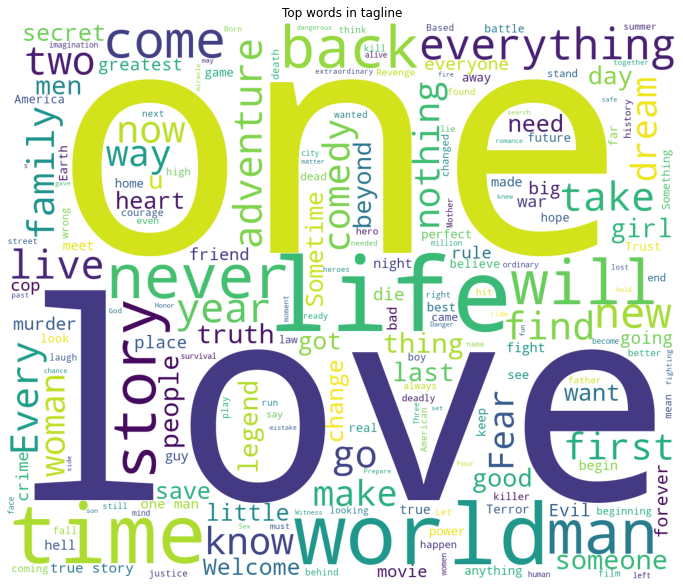

In [138]:
plt.figure(figsize = (12, 12))
text = ' '.join(train['tagline'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in tagline')
plt.axis("off")
plt.show()

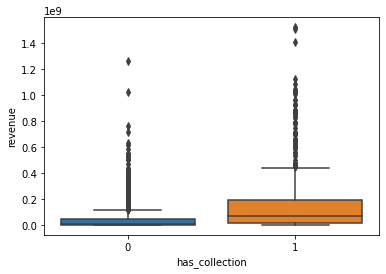

In [139]:
## Collections
sns.boxplot(x='has_collection', y='revenue', data=train);


In [140]:
### Films, which are part of a collection usually have higher revenues. I suppose such films have a bigger fan base thanks to previous films.

In [141]:
### Genres

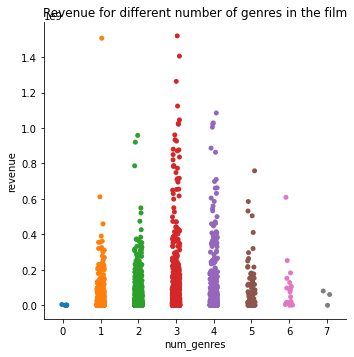

In [142]:
sns.catplot(x='num_genres', y='revenue', data=train);
plt.title('Revenue for different number of genres in the film');

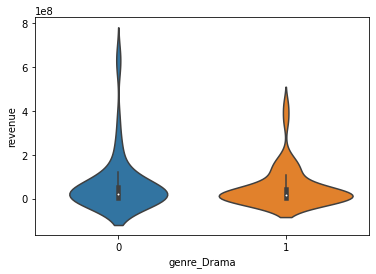

In [143]:
sns.violinplot(x='genre_Drama', y='revenue', data=train[:100]);

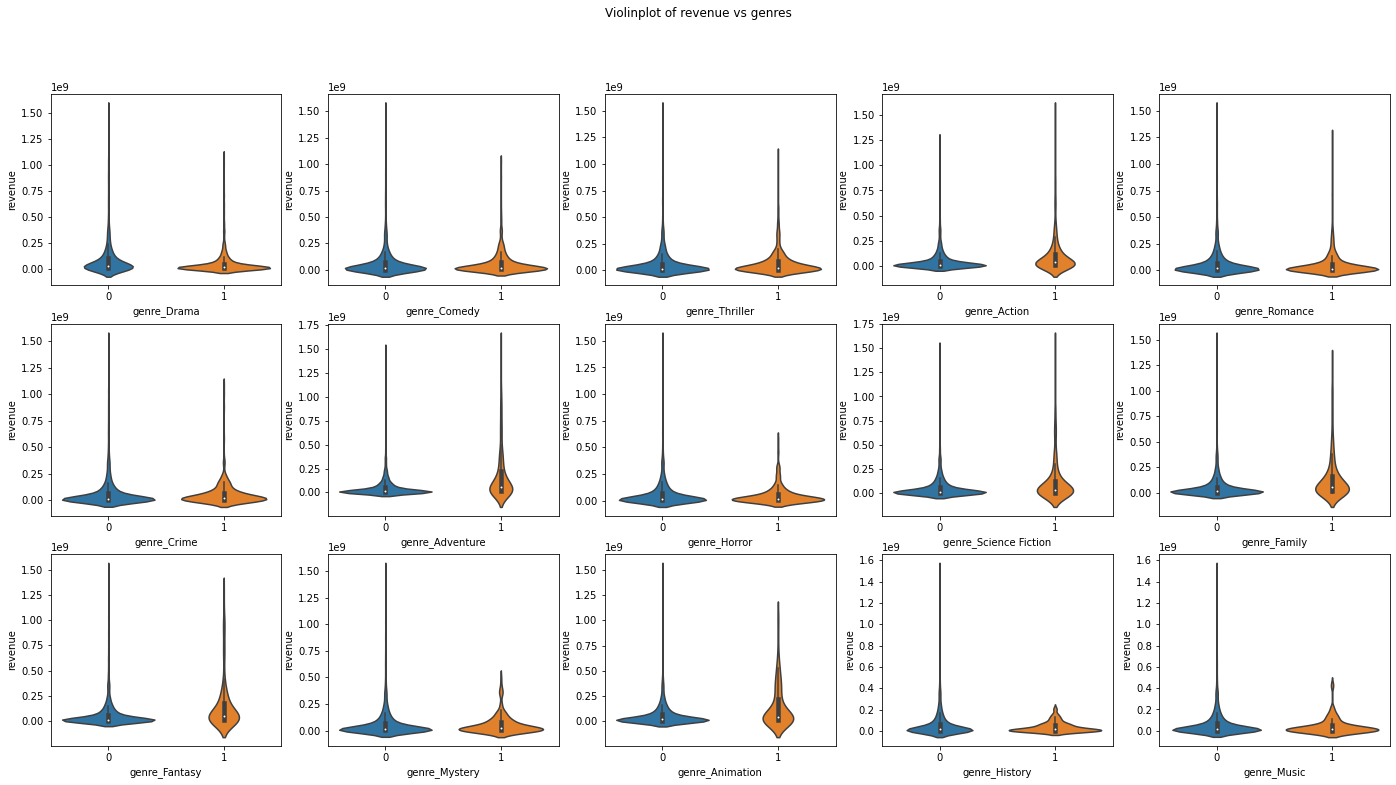

In [144]:
f, axes = plt.subplots(3, 5, figsize=(24, 12))
plt.suptitle('Violinplot of revenue vs genres')
for i, e in enumerate([col for col in train.columns if 'genre_' in col]):
    sns.violinplot(x=e, y='revenue', data=train, ax=axes[i // 5][i % 5]);

In [145]:
#### Some genres tend to have less revenue, some tend to have higher.

In [146]:
#### Production companies

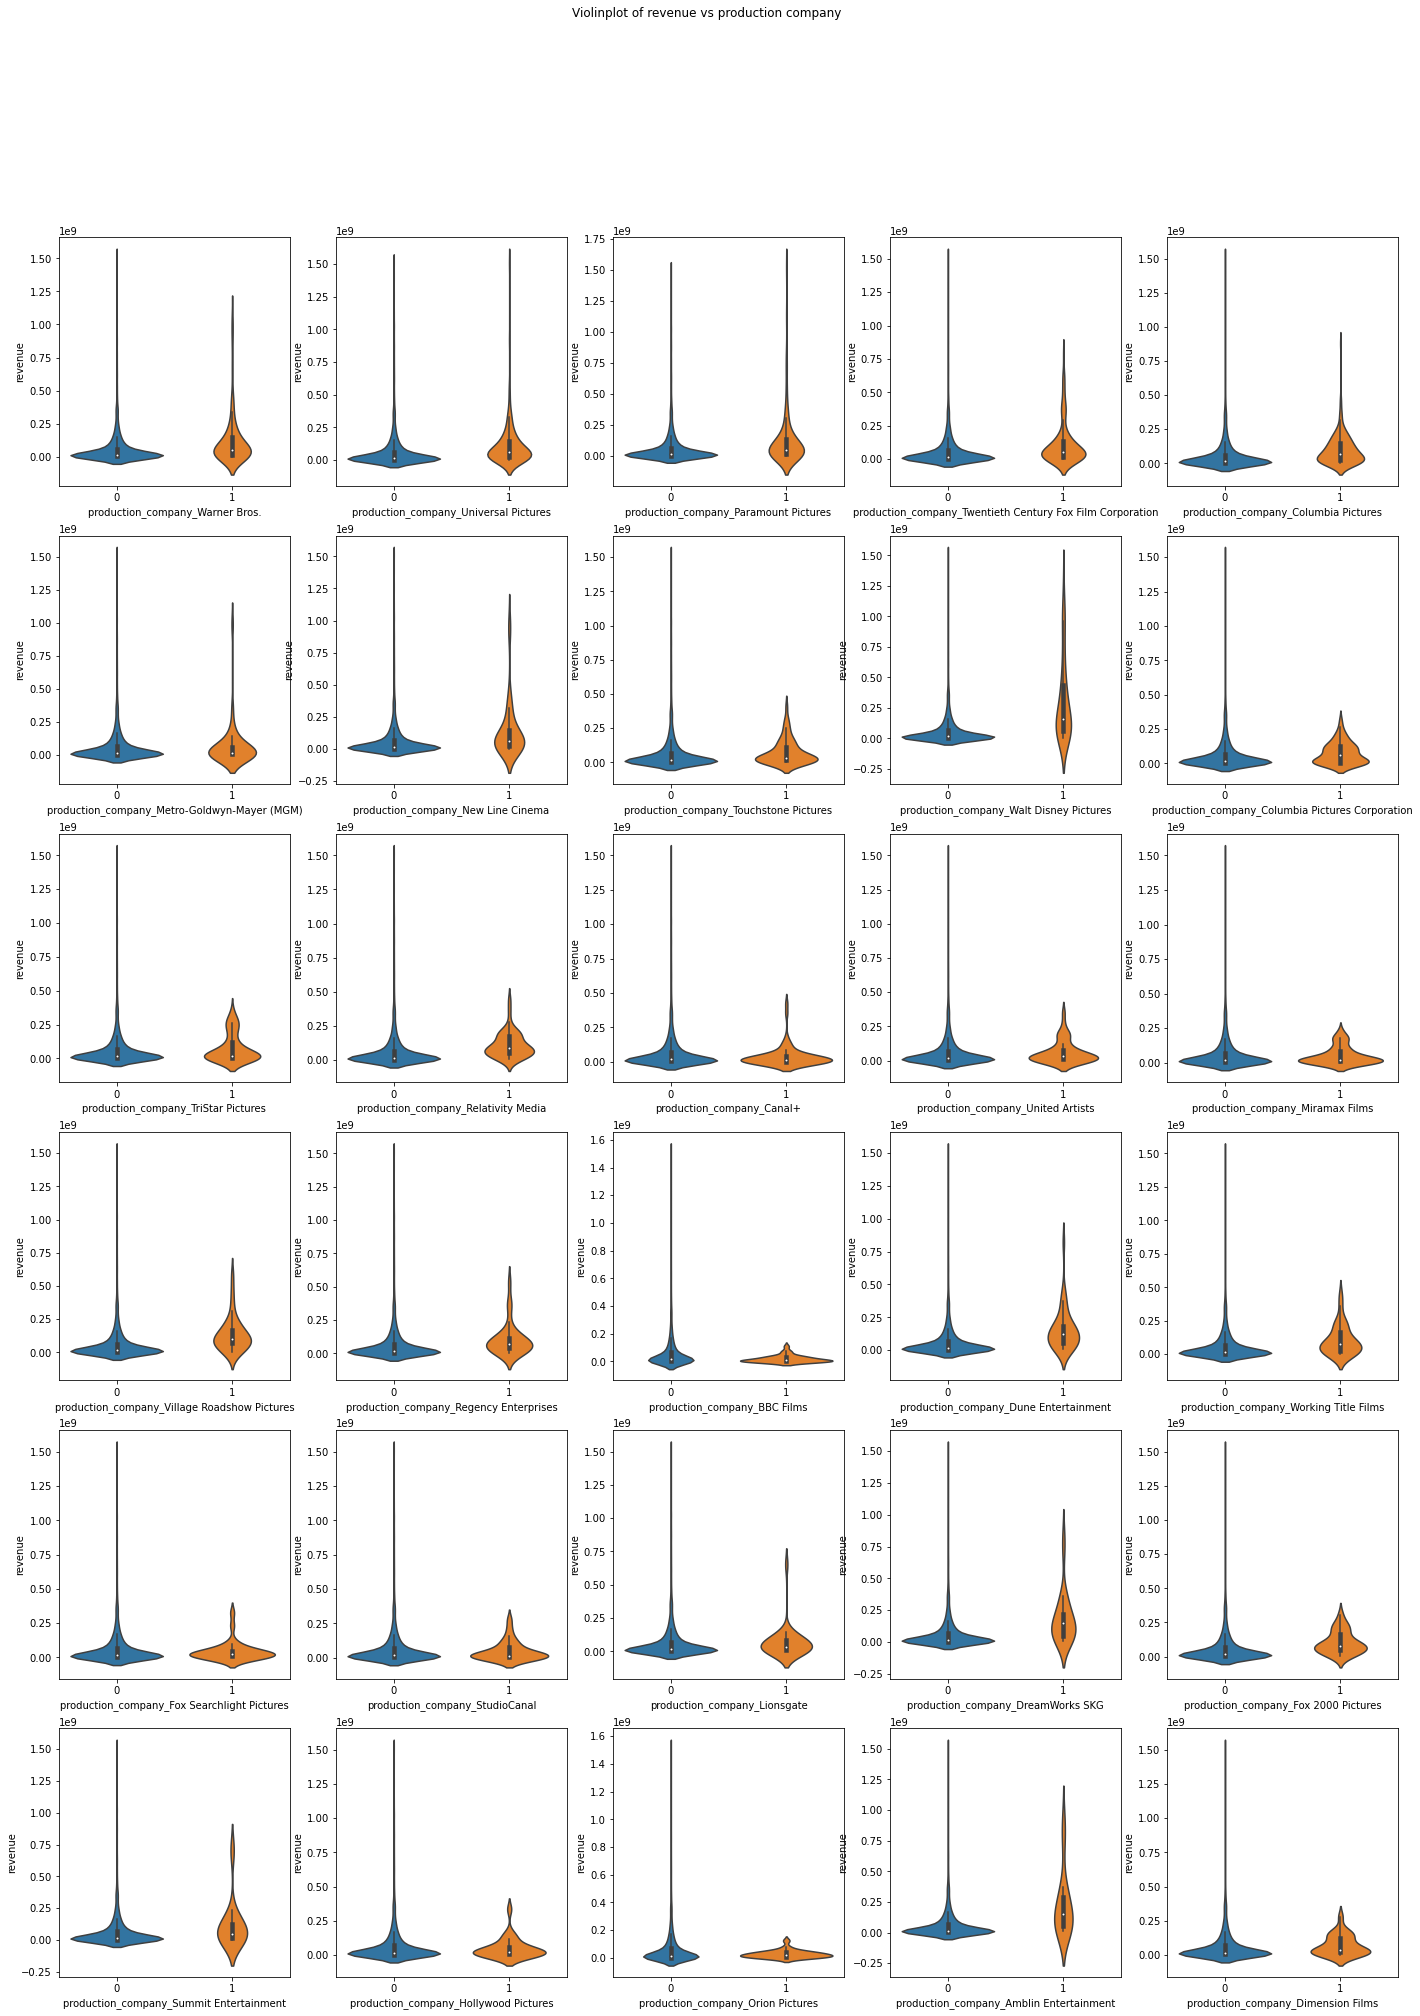

In [147]:
f, axes = plt.subplots(6, 5, figsize=(24, 32))
plt.suptitle('Violinplot of revenue vs production company')
for i, e in enumerate([col for col in train.columns if 'production_company' in col]):
    sns.violinplot(x=e, y='revenue', data=train, ax=axes[i // 5][i % 5]);

In [148]:
### There are only a couple of companies, which have distinctly higher revenues compared to others.

In [149]:
## Production countries

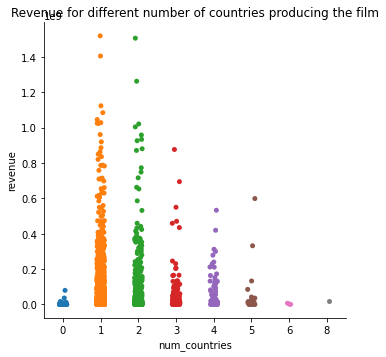

In [150]:
sns.catplot(x='num_countries', y='revenue', data=train);
plt.title('Revenue for different number of countries producing the film');

In [151]:
###I think that number of production countries hardly matters. Most films are produced by 1-2 companies, 
### so films with 1-2 companies have the highest revenue.

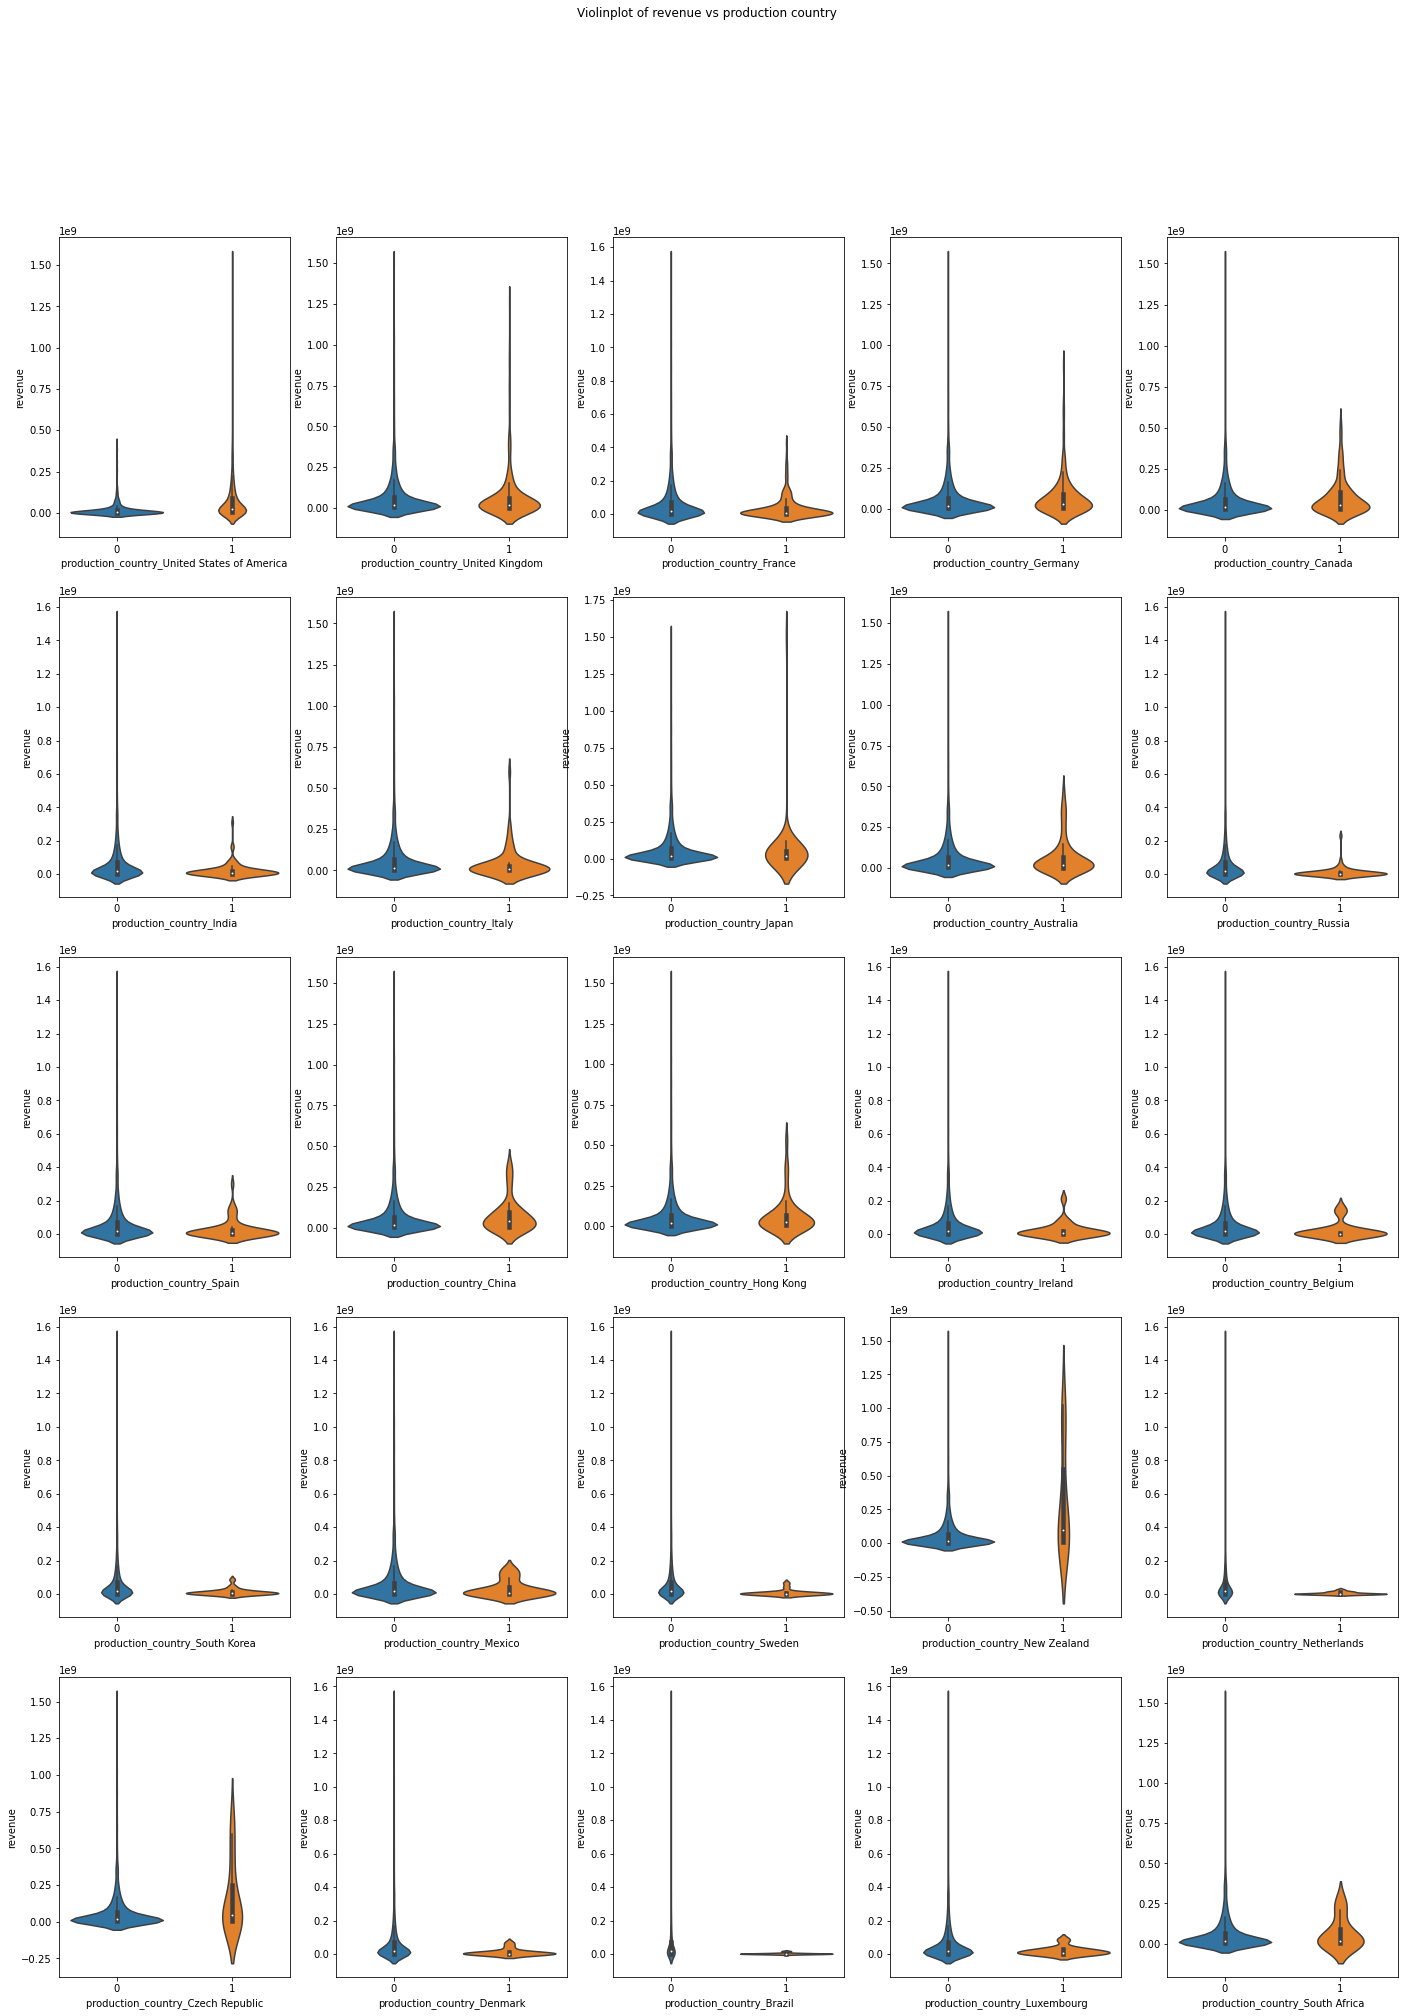

In [152]:
f, axes = plt.subplots(5, 5, figsize=(24, 32))
plt.suptitle('Violinplot of revenue vs production country')
for i, e in enumerate([col for col in train.columns if 'production_country' in col]):
    sns.violinplot(x=e, y='revenue', data=train, ax=axes[i // 5][i % 5]);

In [153]:
### There are only a couple of countries, which have distinctly higher revenues compared to others.

In [154]:
### Cast

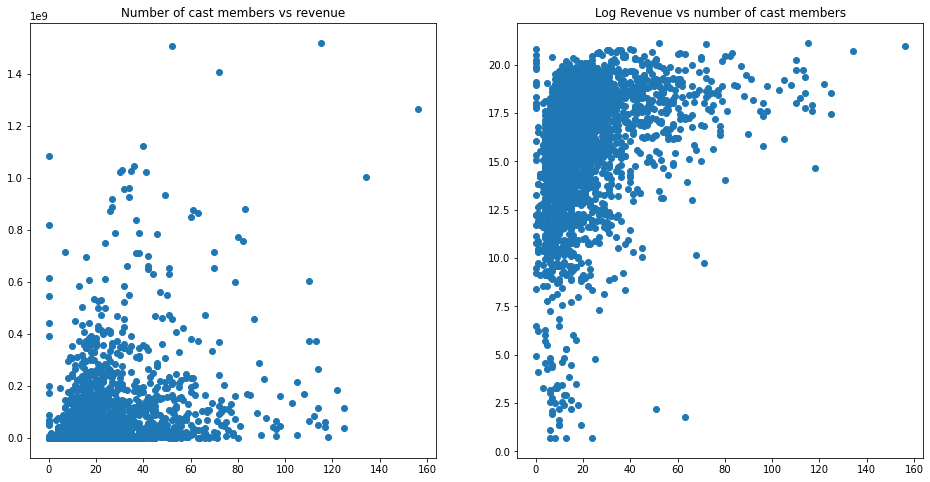

In [155]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(train['num_cast'], train['revenue'])
plt.title('Number of cast members vs revenue');
plt.subplot(1, 2, 2)
plt.scatter(train['num_cast'], train['log_revenue'])
plt.title('Log Revenue vs number of cast members');

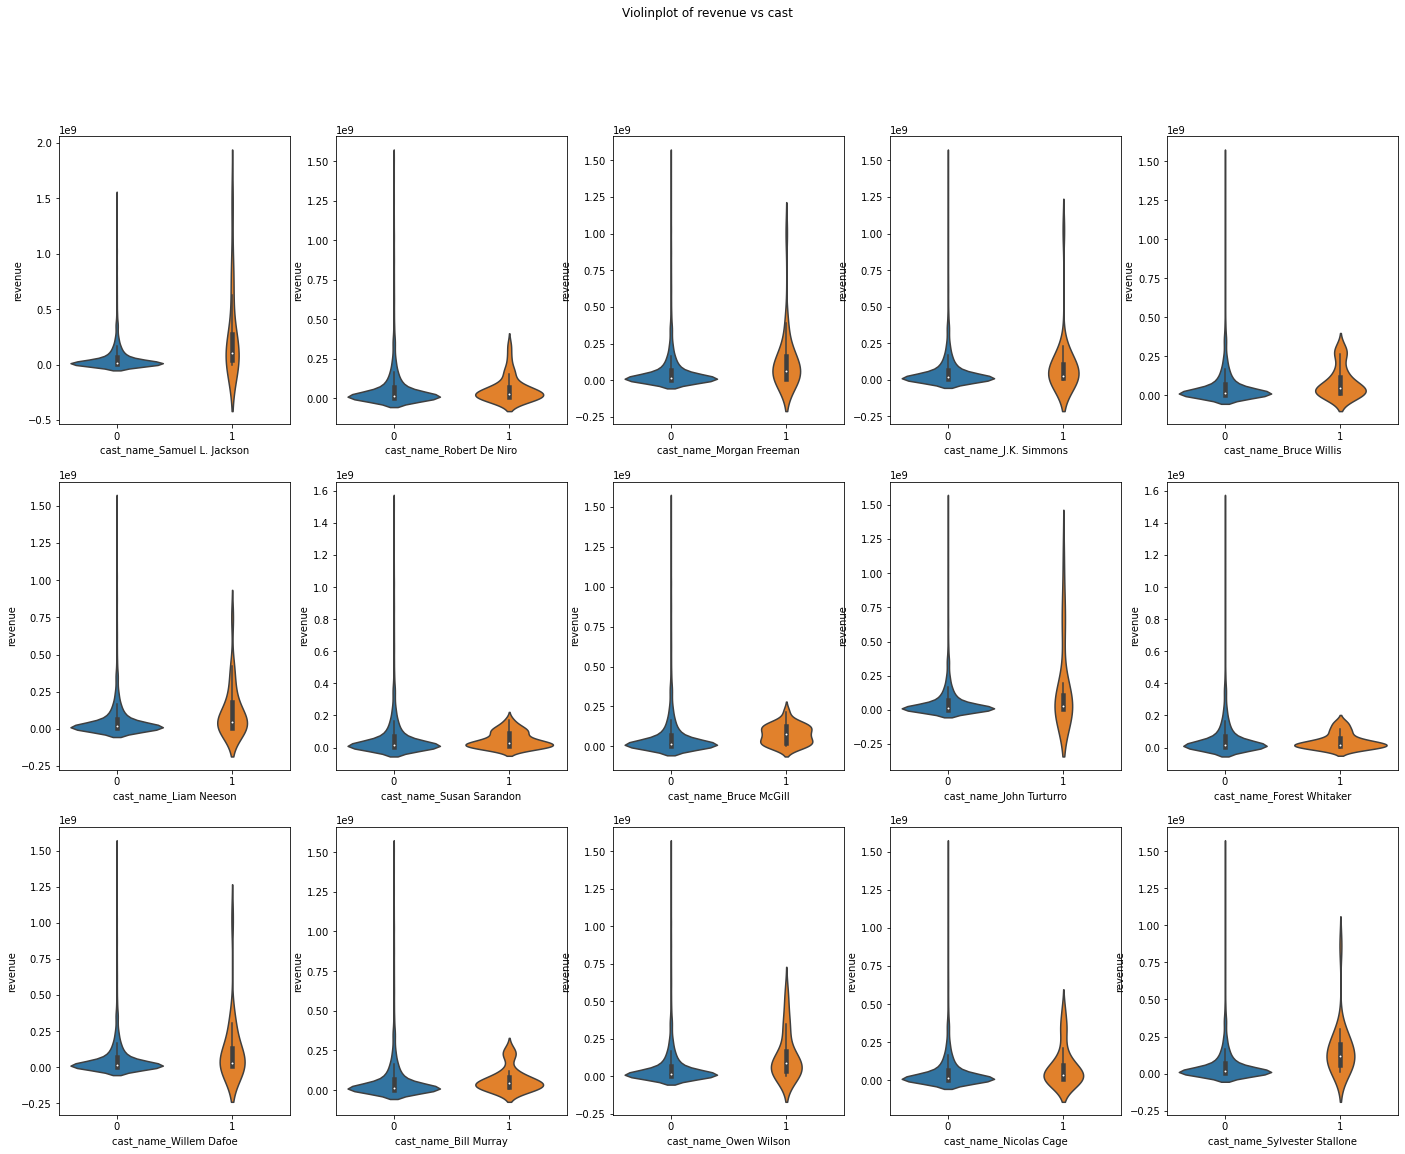

In [156]:
f, axes = plt.subplots(3, 5, figsize=(24, 18))
plt.suptitle('Violinplot of revenue vs cast')
for i, e in enumerate([col for col in train.columns if 'cast_name' in col]):
    sns.violinplot(x=e, y='revenue', data=train, ax=axes[i // 5][i % 5]);

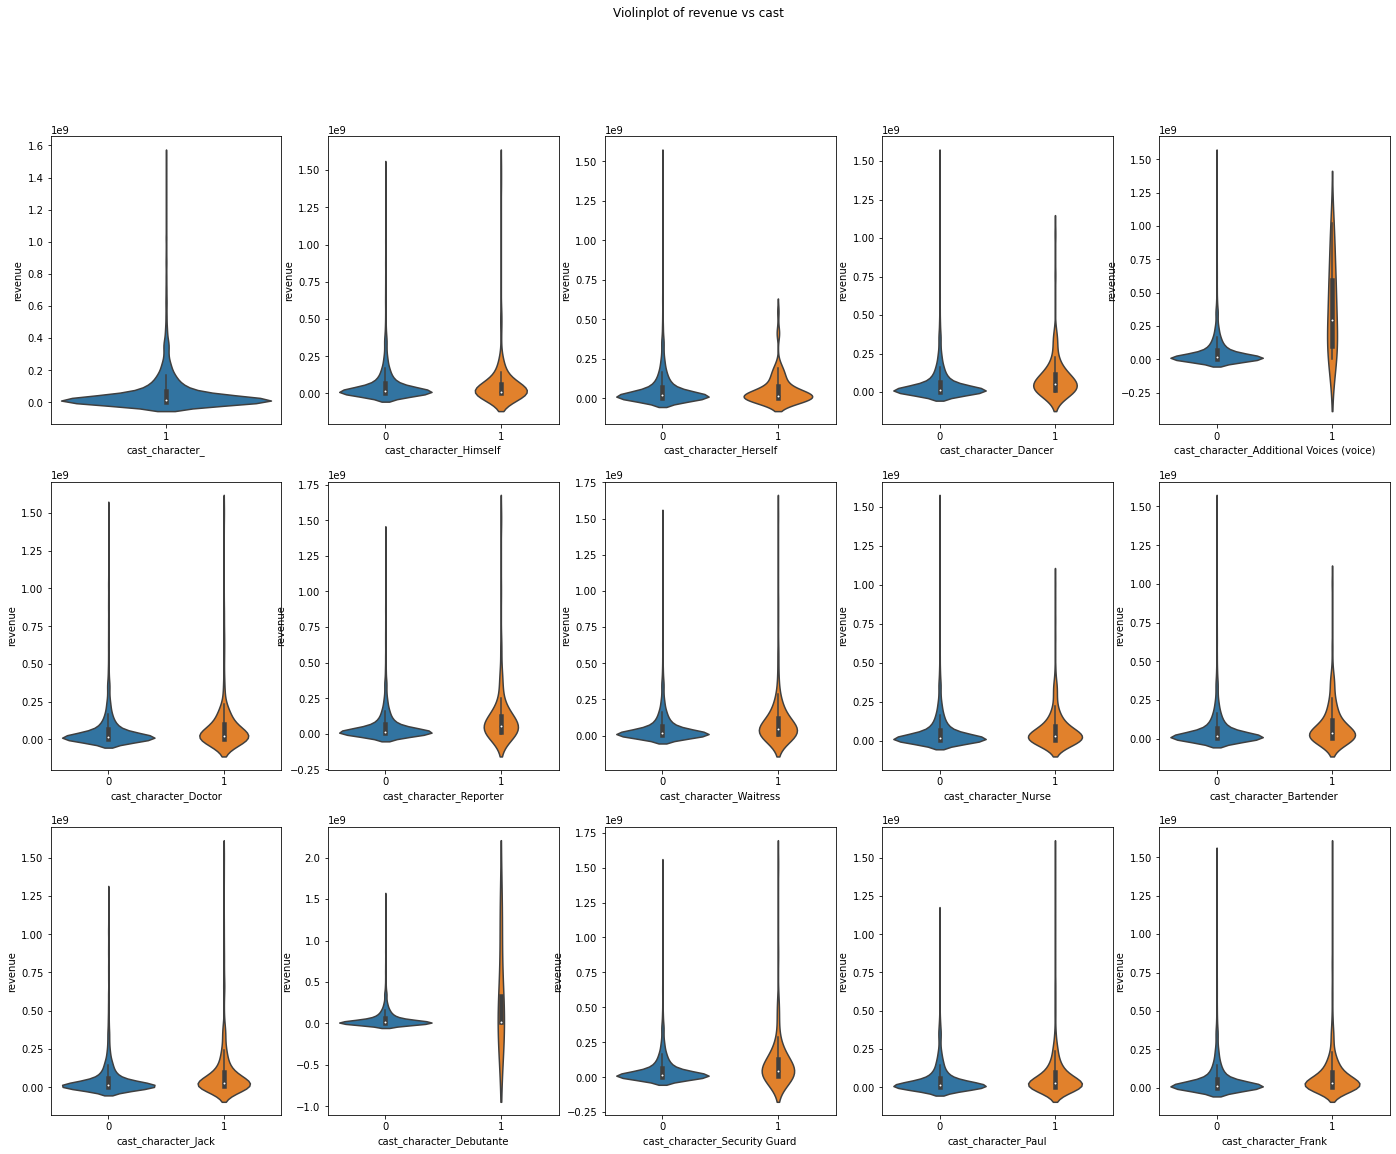

In [157]:
f, axes = plt.subplots(3, 5, figsize=(24, 18))
plt.suptitle('Violinplot of revenue vs cast')
for i, e in enumerate([col for col in train.columns if 'cast_character_' in col]):
    sns.violinplot(x=e, y='revenue', data=train, ax=axes[i // 5][i % 5]);

In [158]:
### Keywords

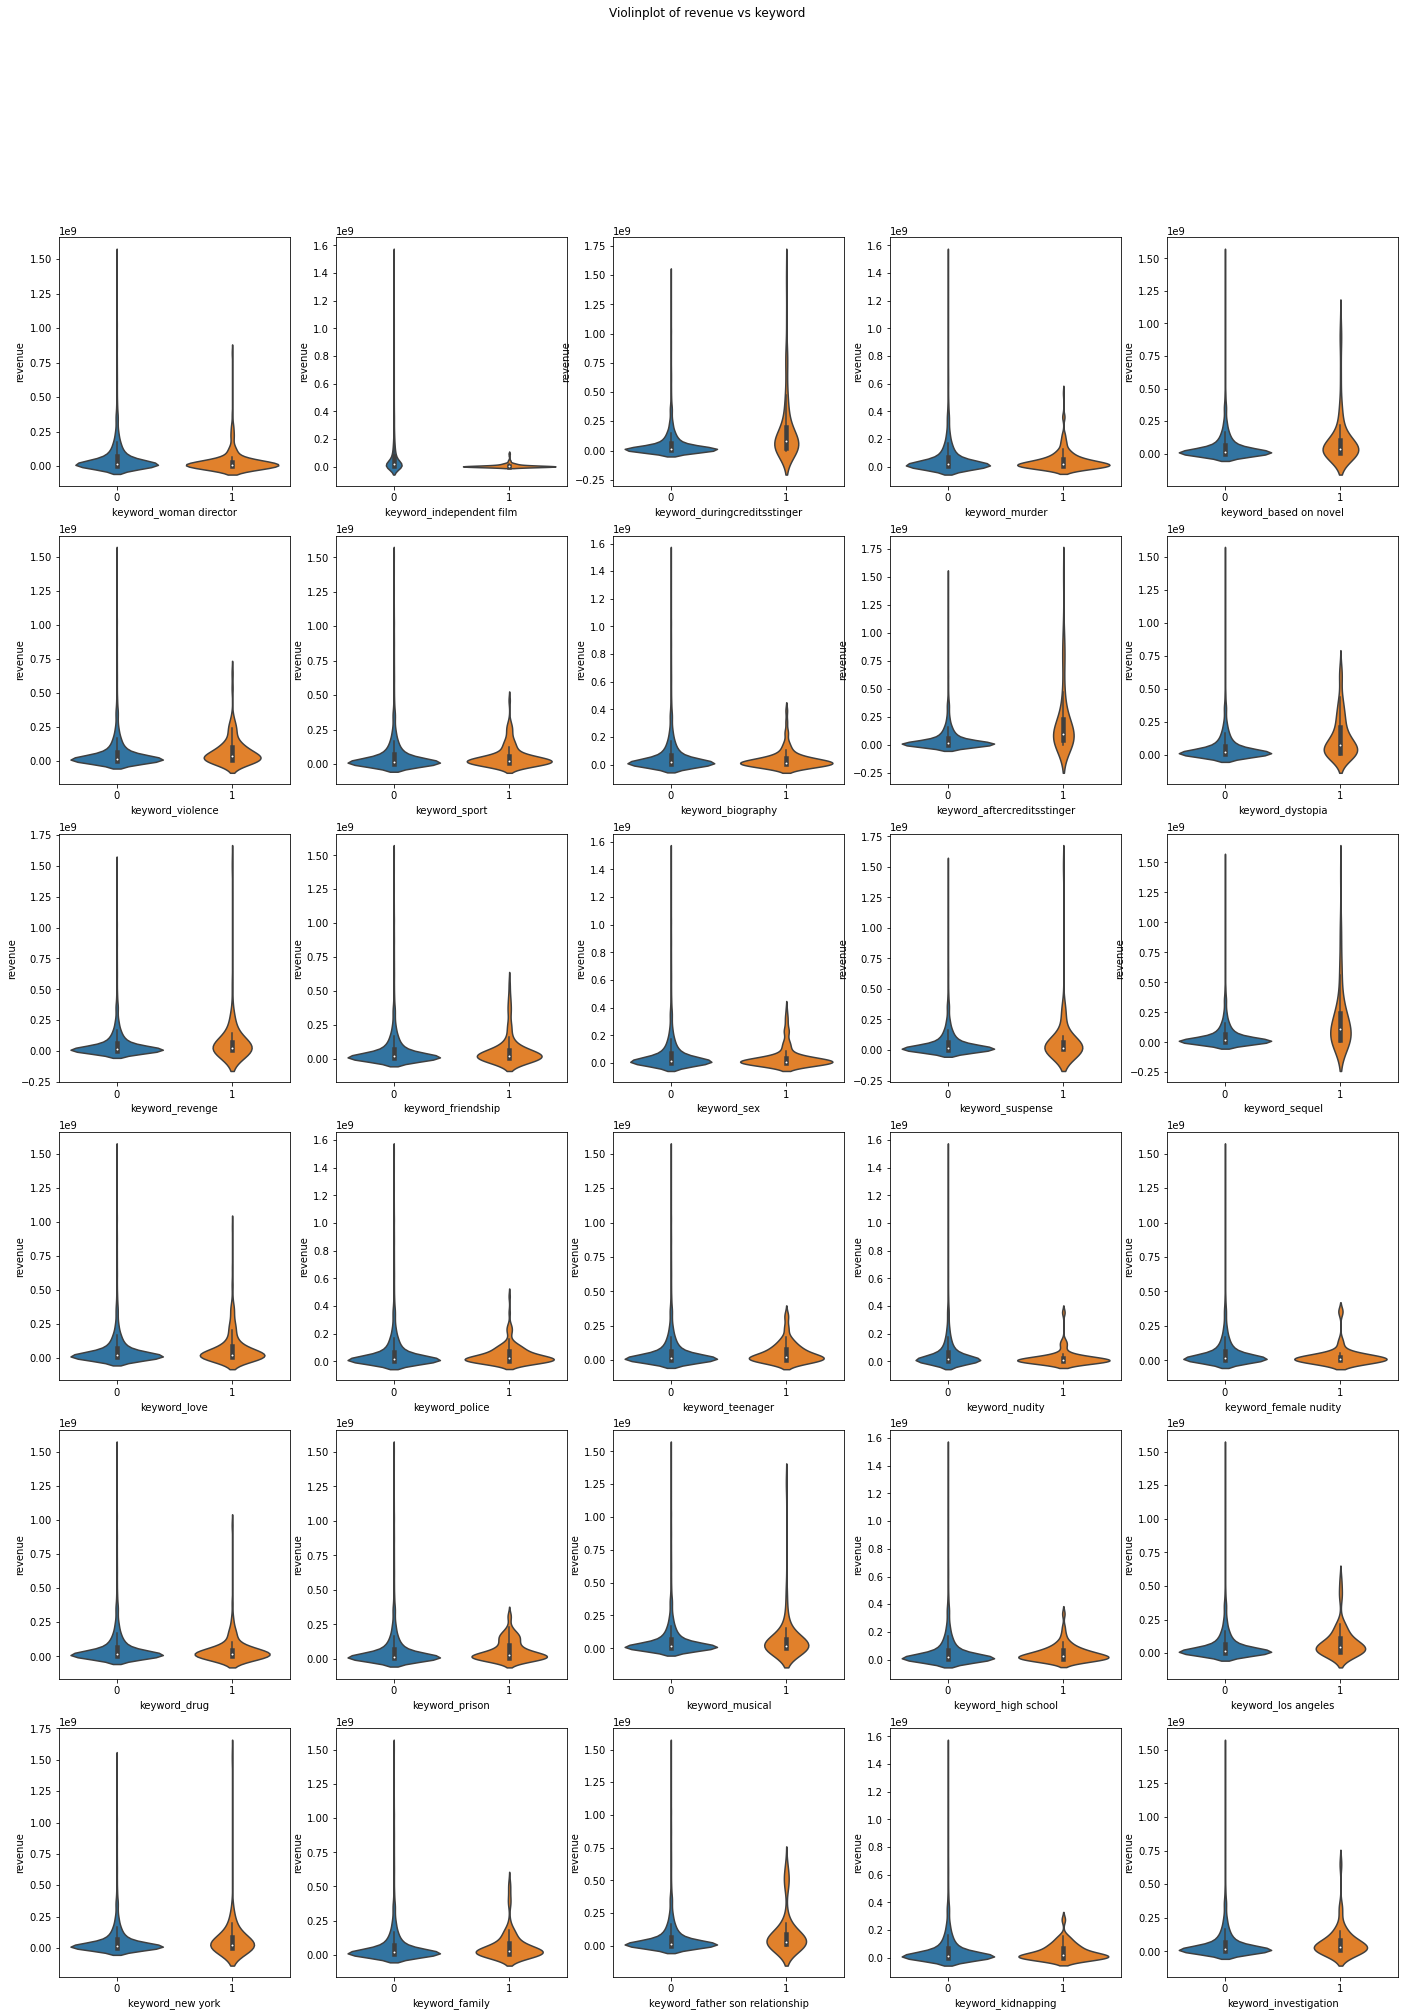

In [159]:
f, axes = plt.subplots(6, 5, figsize=(24, 32))
plt.suptitle('Violinplot of revenue vs keyword')
for i, e in enumerate([col for col in train.columns if 'keyword_' in col]):
    sns.violinplot(x=e, y='revenue', data=train, ax=axes[i // 5][i % 5]);

In [160]:
### Crew

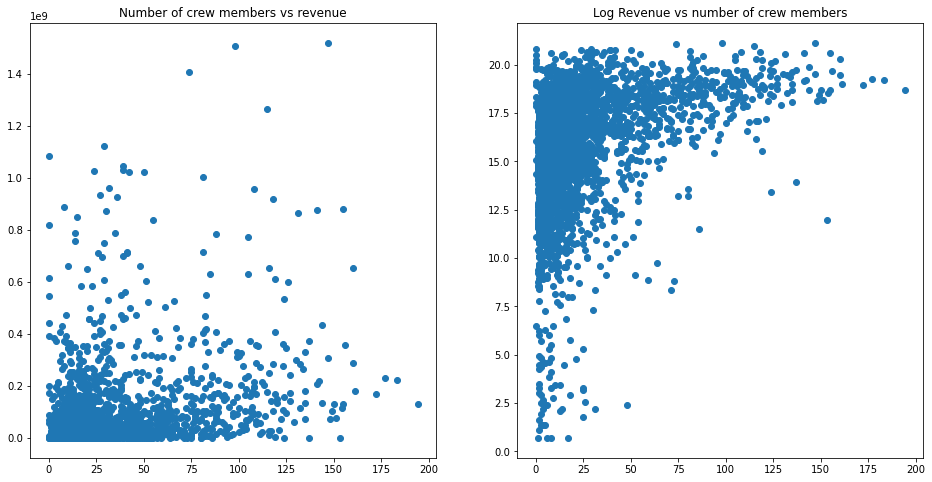

In [161]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(train['num_crew'], train['revenue'])
plt.title('Number of crew members vs revenue');
plt.subplot(1, 2, 2)
plt.scatter(train['num_crew'], train['log_revenue'])
plt.title('Log Revenue vs number of crew members');

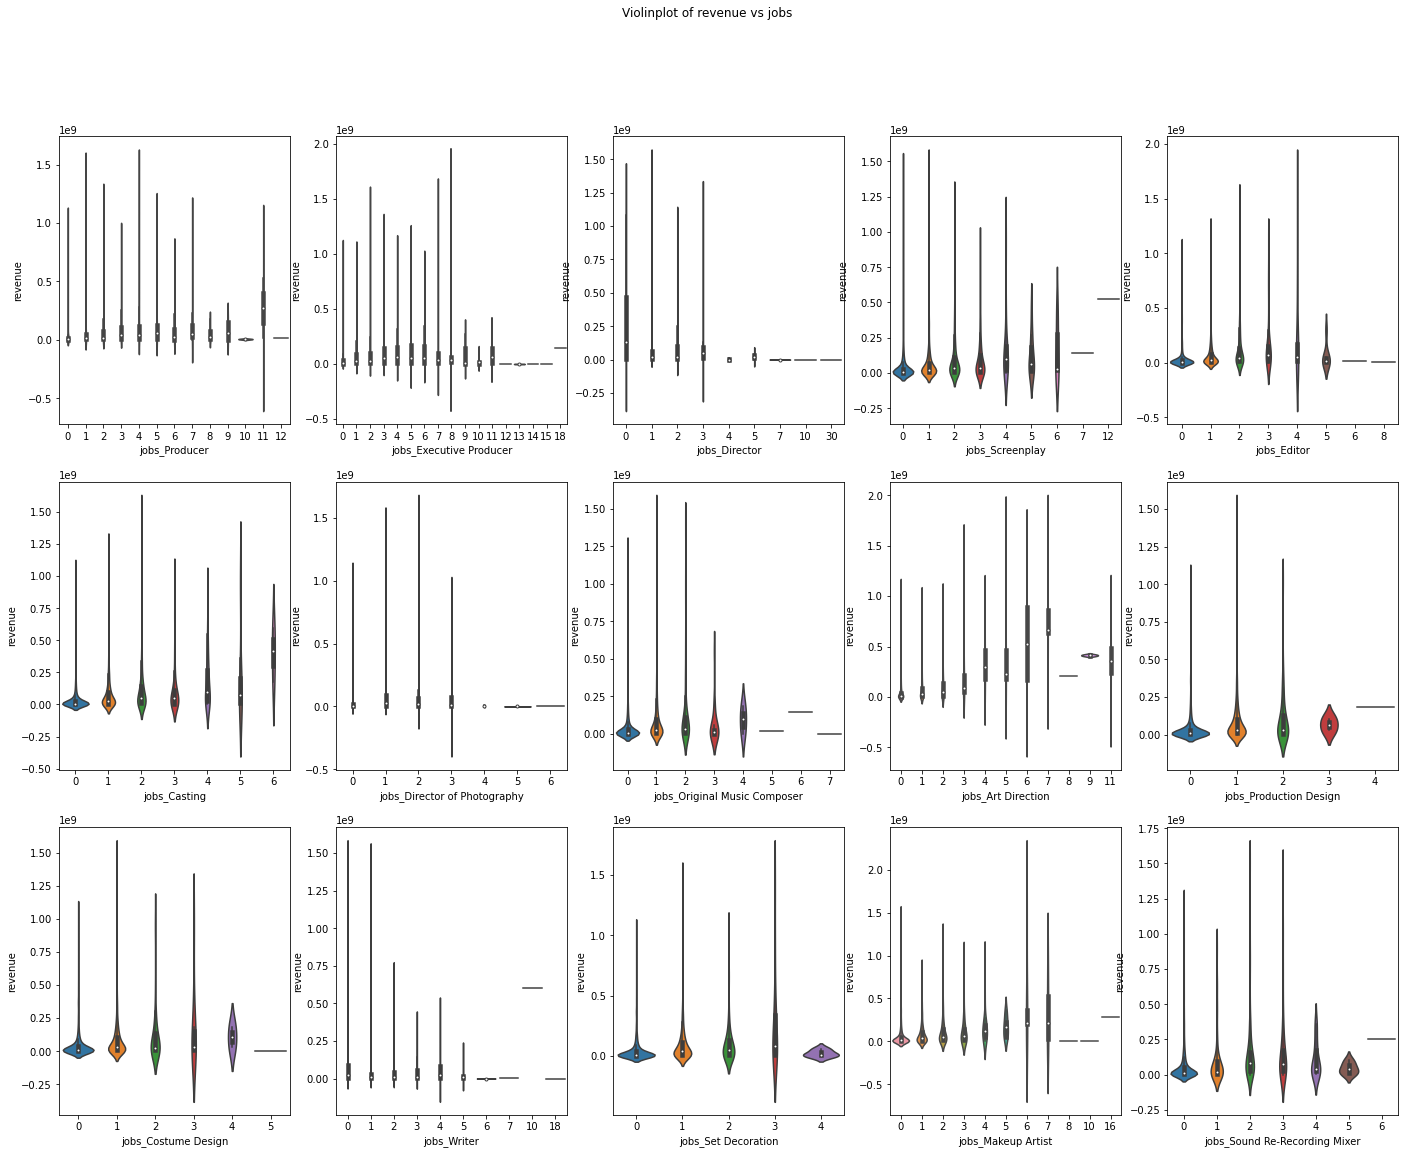

In [163]:
f, axes = plt.subplots(3, 5, figsize=(24, 18))
plt.suptitle('Violinplot of revenue vs jobs')
for i, e in enumerate([col for col in train.columns if 'jobs_' in col]):
    sns.violinplot(x=e, y='revenue', data=train, ax=axes[i // 5][i % 5]);

In [164]:
#### Modelling and feature generation

In [165]:
train = train.drop(['homepage', 'imdb_id', 'poster_path', 'release_date', 'status', 'log_revenue'], axis=1)
test = test.drop(['homepage', 'imdb_id', 'poster_path', 'release_date', 'status'], axis=1)

In [166]:
for col in train.columns:
    if train[col].nunique() == 1:
        print(col)
        train = train.drop([col], axis=1)
        test = test.drop([col], axis=1)

language_
cast_character_


In [170]:
train.shape

(3000, 234)

In [168]:
from sklearn.preprocessing import LabelEncoder

In [171]:
for col in ['original_language', 'collection_name', 'all_genres']:
    le = LabelEncoder()
    le.fit(list(train[col].fillna('')) + list(test[col].fillna('')))
    train[col] = le.transform(train[col].fillna('').astype(str))
    test[col] = le.transform(test[col].fillna('').astype(str))

In [172]:
train_texts = train[['title', 'tagline', 'overview', 'original_title']]
test_texts = test[['title', 'tagline', 'overview', 'original_title']]

In [173]:
for col in ['title', 'tagline', 'overview', 'original_title']:
    train['len_' + col] = train[col].fillna('').apply(lambda x: len(str(x)))
    train['words_' + col] = train[col].fillna('').apply(lambda x: len(str(x.split(' '))))
    train = train.drop(col, axis=1)
    test['len_' + col] = test[col].fillna('').apply(lambda x: len(str(x)))
    test['words_' + col] = test[col].fillna('').apply(lambda x: len(str(x.split(' '))))
    test = test.drop(col, axis=1)

In [174]:
# data fixes from https://www.kaggle.com/somang1418/happy-valentines-day-and-keep-kaggling-3
train.loc[train['id'] == 16,'revenue'] = 192864          # Skinning
train.loc[train['id'] == 90,'budget'] = 30000000         # Sommersby          
train.loc[train['id'] == 118,'budget'] = 60000000        # Wild Hogs
train.loc[train['id'] == 149,'budget'] = 18000000        # Beethoven
train.loc[train['id'] == 313,'revenue'] = 12000000       # The Cookout 
train.loc[train['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
train.loc[train['id'] == 464,'budget'] = 20000000        # Parenthood
train.loc[train['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
train.loc[train['id'] == 513,'budget'] = 930000          # From Prada to Nada
train.loc[train['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
train.loc[train['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
train.loc[train['id'] == 850,'budget'] = 90000000        # Modern Times
train.loc[train['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
train.loc[train['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
train.loc[train['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
train.loc[train['id'] == 1542,'budget'] = 1              # All at Once
train.loc[train['id'] == 1570,'budget'] = 15800000       # Crocodile Dundee II
train.loc[train['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
train.loc[train['id'] == 1714,'budget'] = 46000000       # The Recruit
train.loc[train['id'] == 1721,'budget'] = 17500000       # Cocoon
train.loc[train['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
train.loc[train['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
train.loc[train['id'] == 2491,'revenue'] = 6800000       # Never Talk to Strangers
train.loc[train['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
train.loc[train['id'] == 2612,'budget'] = 15000000       # Field of Dreams
train.loc[train['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
train.loc[train['id'] == 2801,'budget'] = 10000000       # Fracture
test.loc[test['id'] == 3889,'budget'] = 15000000       # Colossal
test.loc[test['id'] == 6733,'budget'] = 5000000        # The Big Sick
test.loc[test['id'] == 3197,'budget'] = 8000000        # High-Rise
test.loc[test['id'] == 6683,'budget'] = 50000000       # The Pink Panther 2
test.loc[test['id'] == 5704,'budget'] = 4300000        # French Connection II
test.loc[test['id'] == 6109,'budget'] = 281756         # Dogtooth
test.loc[test['id'] == 7242,'budget'] = 10000000       # Addams Family Values
test.loc[test['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
test.loc[test['id'] == 5591,'budget'] = 4000000        # The Orphanage
test.loc[test['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee

power_six = train.id[train.budget > 1000][train.revenue < 100]

for k in power_six :
    train.loc[train['id'] == k,'revenue'] =  train.loc[train['id'] == k,'revenue'] * 1000000

In [175]:
X = train.drop(['id', 'revenue'], axis=1)
y = np.log1p(train['revenue'])
X_test = test.drop(['id'], axis=1)

In [177]:
from sklearn.model_selection import train_test_split, KFold


In [178]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1)

In [207]:
import xgboost as xgb
import lightgbm as lgb

In [208]:
params = {'boosting_type':'gbdt', 'class_weight':None,
       'colsample_bytree':1.0,'importance_type':'split',
        'learning_rate':0.01, 'max_depth':5,
       'min_child_samples':20, 'min_child_weight':0.001,
       'min_split_gain':0.0, 'n_estimators':20000, 'n_jobs':-1,
       'num_leaves':30, 'objective':'regression', 'random_state':None,
       'reg_alpha':0.0, 'reg_lambda':0.0, 'silent':True, 'subsample':1.0,
       'subsample_for_bin':200000, 'subsample_freq':0}
model1 = lgb.LGBMRegressor(**params)
model1.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse',
        verbose=1000, early_stopping_rounds=200)

Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[237]	training's rmse: 1.73095	training's l2: 2.99619	valid_1's rmse: 2.06999	valid_1's l2: 4.28485


LGBMRegressor(learning_rate=0.01, max_depth=5, n_estimators=20000,
              num_leaves=30, objective='regression')

In [209]:
eli5.show_weights(model1, feature_filter=lambda x: x != '<BIAS>')

In [210]:
n_fold = 10
folds = KFold(n_splits=n_fold, shuffle=True, random_state=42)

In [211]:
def train_model(X, X_test, y, params=None, folds=folds, model_type='lgb', plot_feature_importance=False, model=None):

    oof = np.zeros(X.shape[0])
    prediction = np.zeros(X_test.shape[0])
    scores = []
    feature_importance = pd.DataFrame()
    for fold_n, (train_index, valid_index) in enumerate(folds.split(X)):
        print('Fold', fold_n, 'started at', time.ctime())
        if model_type == 'sklearn':
            X_train, X_valid = X[train_index], X[valid_index]
        else:
            X_train, X_valid = X.values[train_index], X.values[valid_index]
        y_train, y_valid = y[train_index], y[valid_index]
        
        if model_type == 'lgb':
            model = lgb.LGBMRegressor(**params, n_estimators = 20000, nthread = 4, n_jobs = -1)
            model.fit(X_train, y_train, 
                    eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse',
                    verbose=1000, early_stopping_rounds=200)
            
            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(X_test, num_iteration=model.best_iteration_)
            
        if model_type == 'xgb':
            train_data = xgb.DMatrix(data=X_train, label=y_train)
            valid_data = xgb.DMatrix(data=X_valid, label=y_valid)

            watchlist = [(train_data, 'train'), (valid_data, 'valid_data')]
            model = xgb.train(dtrain=train_data, num_boost_round=20000, evals=watchlist, early_stopping_rounds=200, verbose_eval=500, params=params)
            y_pred_valid = model.predict(xgb.DMatrix(X_valid), ntree_limit=model.best_ntree_limit)
            y_pred = model.predict(xgb.DMatrix(X_test.values), ntree_limit=model.best_ntree_limit)

        if model_type == 'sklearn':
            model = model
            model.fit(X_train, y_train)
            y_pred_valid = model.predict(X_valid).reshape(-1,)
            score = mean_squared_error(y_valid, y_pred_valid)
            
            y_pred = model.predict(X_test)
            
        if model_type == 'cat':
            model = CatBoostRegressor(iterations=20000,  eval_metric='RMSE', **params)
            model.fit(X_train, y_train, eval_set=(X_valid, y_valid), cat_features=[], use_best_model=True, verbose=False)

            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(X_test)
        
        oof[valid_index] = y_pred_valid.reshape(-1,)
        scores.append(mean_squared_error(y_valid, y_pred_valid) ** 0.5)
        
        prediction += y_pred    
        
        if model_type == 'lgb':
            # feature importance
            fold_importance = pd.DataFrame()
            fold_importance["feature"] = X.columns
            fold_importance["importance"] = model.feature_importances_
            fold_importance["fold"] = fold_n + 1
            feature_importance = pd.concat([feature_importance, fold_importance], axis=0)

    prediction /= n_fold
    
    print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))
    
    if model_type == 'lgb':
        feature_importance["importance"] /= n_fold
        if plot_feature_importance:
            cols = feature_importance[["feature", "importance"]].groupby("feature").mean().sort_values(
                by="importance", ascending=False)[:50].index

            best_features = feature_importance.loc[feature_importance.feature.isin(cols)]

            plt.figure(figsize=(16, 12));
            sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False));
            plt.title('LGB Features (avg over folds)');
        
            return oof, prediction, feature_importance
        return oof, prediction
    
    else:
        return oof, prediction


In [213]:
import time

In [215]:
from sklearn.metrics import mean_squared_error


Fold 0 started at Tue Feb 23 19:46:25 2021
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 200 rounds
[1000]	training's rmse: 1.17573	valid_1's rmse: 1.83381
Early stopping, best iteration is:
[969]	tra

[1000]	training's rmse: 1.18093	valid_1's rmse: 2.11653
[2000]	training's rmse: 0.884531	valid_1's rmse: 2.06037
[3000]	training's rmse: 0.680901	valid_1's rmse: 2.03704
[4000]	training's rmse: 0.526076	valid_1's rmse: 2.02837
Early stopping, best iteration is:
[3982]	training's rmse: 0.52856	valid_1's rmse: 2.02796
Fold 8 started at Tue Feb 23 19:47:36 2021
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will 

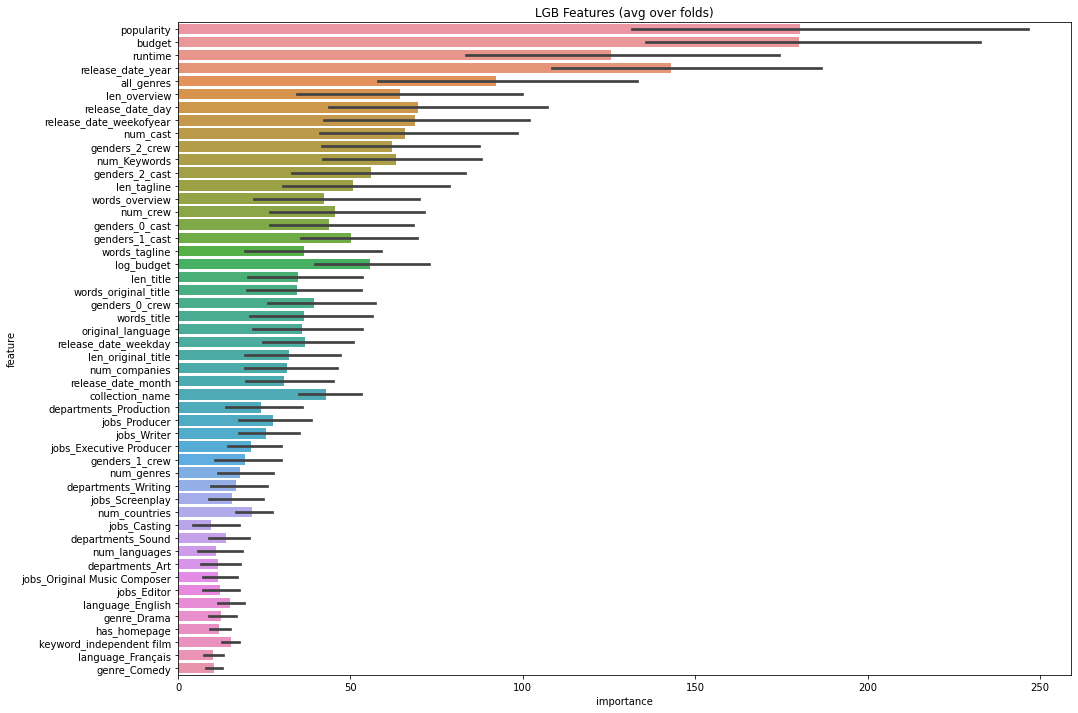

In [216]:
params = {'num_leaves': 30,
         'min_data_in_leaf': 10,
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}
oof_lgb, prediction_lgb, _ = train_model(X, X_test, y, params=params, model_type='lgb', plot_feature_importance=True)

In [218]:
from sklearn import linear_model


In [219]:
for col in train_texts.columns:
    vectorizer = TfidfVectorizer(
                sublinear_tf=True,
                analyzer='word',
                token_pattern=r'\w{1,}',
                ngram_range=(1, 2),
                min_df=10
    )
    vectorizer.fit(list(train_texts[col].fillna('')) + list(test_texts[col].fillna('')))
    train_col_text = vectorizer.transform(train_texts[col].fillna(''))
    test_col_text = vectorizer.transform(test_texts[col].fillna(''))
    model = linear_model.RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0, 100.0), scoring='neg_mean_squared_error', cv=folds)
    oof_text, prediction_text = train_model(train_col_text, test_col_text, y, params=None, model_type='sklearn', model=model)
    
    X[col + '_oof'] = oof_text
    X_test[col + '_oof'] = prediction_text

Fold 0 started at Tue Feb 23 19:48:38 2021
Fold 1 started at Tue Feb 23 19:48:39 2021
Fold 2 started at Tue Feb 23 19:48:39 2021
Fold 3 started at Tue Feb 23 19:48:40 2021
Fold 4 started at Tue Feb 23 19:48:40 2021
Fold 5 started at Tue Feb 23 19:48:41 2021
Fold 6 started at Tue Feb 23 19:48:42 2021
Fold 7 started at Tue Feb 23 19:48:42 2021
Fold 8 started at Tue Feb 23 19:48:43 2021
Fold 9 started at Tue Feb 23 19:48:43 2021
CV mean score: 2.9692, std: 0.2116.
Fold 0 started at Tue Feb 23 19:48:44 2021
Fold 1 started at Tue Feb 23 19:48:45 2021
Fold 2 started at Tue Feb 23 19:48:46 2021
Fold 3 started at Tue Feb 23 19:48:47 2021
Fold 4 started at Tue Feb 23 19:48:49 2021
Fold 5 started at Tue Feb 23 19:48:49 2021
Fold 6 started at Tue Feb 23 19:48:50 2021
Fold 7 started at Tue Feb 23 19:48:51 2021
Fold 8 started at Tue Feb 23 19:48:52 2021
Fold 9 started at Tue Feb 23 19:48:53 2021
CV mean score: 2.8814, std: 0.1759.
Fold 0 started at Tue Feb 23 19:48:57 2021
Fold 1 started at Tue Feb

In [220]:
X.head()

budget  original_language  popularity  runtime  collection_name  \
0  14000000                 10    6.575393     93.0              282   
1  40000000                 10    8.248895    113.0              641   
2   3300000                 10   64.299990    105.0                1   
3   1200000                 16    3.174936    122.0                1   
4         0                 24    1.148070    118.0                1   

   has_collection  num_genres  all_genres  genre_Drama  genre_Comedy  ...  \
0               1           1         480            0             1  ...   
1               1           4         516            1             1  ...   
2               0           1         658            1             0  ...   
3               0           2         742            1             0  ...   
4               0           2         295            0             0  ...   

   len_tagline  words_tagline  len_overview  words_overview  \
0           52             86           155             243   
1           60            100           393             601   
2           47             78           130             194   
3            0              4           581             900   
4            0              4           168             265   

   len_original_title  words_original_title  title_oof  tagline_oof  \
0                  22                    38  16.076689    16.446690   
1                  40                    59  16.520678    15.663120   
2                   8                    12  15.937784    16.220826   
3                   7                    11  16.015783    15.359028   
4                   4                     8  14.970161    15.346795   

   overview_oof  original_title_oof  
0     16.259715           16.095561  
1     16.149713           16.982991  
2     16.034568           15.836261  
3     15.827388           15.912662  
4     15.574022           15.853722  

[5 rows x 240 columns]

In [221]:
def new_features(df):
    df['budget_to_popularity'] = df['budget'] / df['popularity']
    df['budget_to_runtime'] = df['budget'] / df['runtime']
    
    # some features from https://www.kaggle.com/somang1418/happy-valentines-day-and-keep-kaggling-3
    df['_budget_year_ratio'] = df['budget'] / (df['release_date_year'] * df['release_date_year'])
    df['_releaseYear_popularity_ratio'] = df['release_date_year'] / df['popularity']
    df['_releaseYear_popularity_ratio2'] = df['popularity'] / df['release_date_year']
    
    df['runtime_to_mean_year'] = df['runtime'] / df.groupby("release_date_year")["runtime"].transform('mean')
    df['popularity_to_mean_year'] = df['popularity'] / df.groupby("release_date_year")["popularity"].transform('mean')
    df['budget_to_mean_year'] = df['budget'] / df.groupby("release_date_year")["budget"].transform('mean')
        
    return df

In [222]:
X = new_features(X)
X_test = new_features(X_test)

Fold 0 started at Tue Feb 23 19:50:44 2021
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
Training until validation scores don't improve for 200 rounds
[1000]	training's rmse: 1.1416	valid_1's rmse: 1.81721
Early stopping, best iteration is:
[1763]	tra

[1000]	training's rmse: 1.12892	valid_1's rmse: 2.14358
[2000]	training's rmse: 0.809227	valid_1's rmse: 2.09124
[3000]	training's rmse: 0.600555	valid_1's rmse: 2.07044
[4000]	training's rmse: 0.445504	valid_1's rmse: 2.06571
Early stopping, best iteration is:
[3867]	training's rmse: 0.462983	valid_1's rmse: 2.06475
Fold 8 started at Tue Feb 23 19:52:43 2021
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will

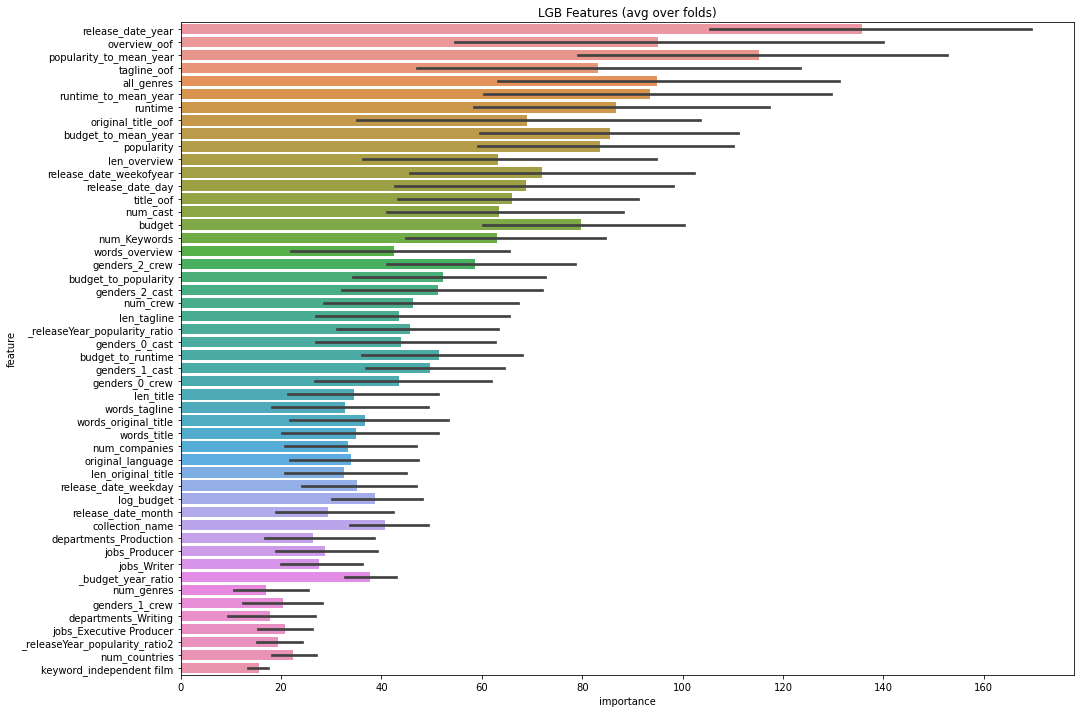

In [223]:
oof_lgb, prediction_lgb, _ = train_model(X, X_test, y, params=params, model_type='lgb', plot_feature_importance=True)

In [229]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1)

params = {'num_leaves': 30,
         'objective': 'regression',
         'max_depth': 6,
         'learning_rate': 0.01,
        }
model1 = lgb.LGBMRegressor(**params, n_estimators = 20000, n_jobs = -1)
model1.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse',
        verbose=1000, early_stopping_rounds=200)

eli5.show_weights(model1, feature_filter=lambda x: x != '<BIAS>')

Training until validation scores don't improve for 200 rounds
[1000]	training's rmse: 1.16277	training's l2: 1.35204	valid_1's rmse: 1.90271	valid_1's l2: 3.62032
Early stopping, best iteration is:
[1584]	training's rmse: 0.958764	training's l2: 0.919228	valid_1's rmse: 1.88129	valid_1's l2: 3.53924


In [231]:
import shap

ModuleNotFoundError: No module named 'shap'

In [232]:
def top_cols_interaction(df):
    df['budget_to_year'] = df['budget'] / df['release_date_year']
    df['budget_to_mean_year_to_year'] = df['budget_to_mean_year'] / df['release_date_year']
    df['popularity_to_mean_year_to_log_budget'] = df['popularity_to_mean_year'] / df['log_budget']
    df['year_to_log_budget'] = df['release_date_year'] / df['log_budget']
    df['budget_to_runtime_to_year'] = df['budget_to_runtime'] / df['release_date_year']
    df['genders_1_cast_to_log_budget'] = df['genders_1_cast'] / df['log_budget']
    df['all_genres_to_popularity_to_mean_year'] = df['all_genres'] / df['popularity_to_mean_year']
    df['genders_2_crew_to_budget_to_mean_year'] = df['genders_2_crew'] / df['budget_to_mean_year']
    df['overview_oof_to_genders_2_crew'] = df['overview_oof'] / df['genders_2_crew']
    
    return df

In [233]:
X = top_cols_interaction(X)
X_test = top_cols_interaction(X_test)

In [234]:
X = X.replace([np.inf, -np.inf], 0).fillna(0)
X_test = X_test.replace([np.inf, -np.inf], 0).fillna(0)

In [236]:
xgb_params = {'eta': 0.01,
              'objective': 'reg:linear',
              'max_depth': 7,
              'subsample': 0.8,
              'colsample_bytree': 0.8,
              'eval_metric': 'rmse',
              'seed': 11,
              'silent': True}
oof_xgb, prediction_xgb = train_model(X, X_test, y, params=xgb_params, model_type='xgb', plot_feature_importance=False)

Fold 0 started at Tue Feb 23 20:14:02 2021
[20:14:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[20:14:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:15.59641	valid_data-rmse:15.89930
Multiple eval metrics have been passed: 'valid_data-rmse' will be used for early stopping.

Will train until valid_data-rmse hasn't improved in 200 rounds.
[500]	train-rmse:0.94727	valid_data-rmse:1.81631
[1000]	train-rmse:0.58206	valid_data-rmse:1.78735
[1500]	train-rmse:0.37545	valid_data-rmse:1.78335
Stopping. Best iteration:
[1520]	train-rms

Fold 7 started at Tue Feb 23 20:21:19 2021
[20:21:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[20:21:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:15.65465	valid_data-rmse:15.37193
Multiple eval metrics have been passed: 'valid_data-rmse' will be used for early stopping.

Will train until valid_data-rmse hasn't improved in 200 rounds.
[500]	train-rmse:0.94214	valid_data-rmse:2.17236
[1000]	train-rmse:0.57873	valid_data-rmse:2.16397
[1500]	train-rmse:0.37417	valid_data-rmse:2.15826
[2000]	train-rmse:0.24280	valid_data-rmse:

In [237]:
#### XGB is working great